**Downloading Libraries**

In [1]:
!pip install torch torchvision torchaudio
!pip install 'git+https://github.com/facebookresearch/detectron2.git'

  Using cached torchaudio-2.5.1-cp311-cp311-manylinux1_x86_64.whl.metadata (6.4 kB)
  Using cached torch-2.5.1-cp311-cp311-manylinux1_x86_64.whl.metadata (28 kB)
  Using cached nvidia_cuda_nvrtc_cu12-12.4.127-py3-none-manylinux2014_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cuda_runtime_cu12-12.4.127-py3-none-manylinux2014_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cuda_cupti_cu12-12.4.127-py3-none-manylinux2014_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cudnn_cu12-9.1.0.70-py3-none-manylinux2014_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cublas_cu12-12.4.5.8-py3-none-manylinux2014_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cufft_cu12-11.2.1.3-py3-none-manylinux2014_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_curand_cu12-10.3.5.147-py3-none-manylinux2014_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cusolver_cu12-11.6.1.9-py3-none-manylinux2014_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cusparse_cu12-12.3.1.170-py3-none-manyli

In [2]:
import detectron2
from detectron2.utils.logger import setup_logger
setup_logger()

print(detectron2.__version__)


0.6


In [3]:
!pip install opencv-python

  Using cached opencv_python-4.10.0.84-cp37-abi3-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (20 kB)
Using cached opencv_python-4.10.0.84-cp37-abi3-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (62.5 MB)


In [4]:
!pip install --upgrade torch torchvision

  Using cached torchvision-0.20.1-cp311-cp311-manylinux1_x86_64.whl.metadata (6.1 kB)
Using cached torchvision-0.20.1-cp311-cp311-manylinux1_x86_64.whl (7.2 MB)
  Attempting uninstall: torchvision
    Found existing installation: torchvision 0.18.1a0+405940f
    Uninstalling torchvision-0.18.1a0+405940f:
      Successfully uninstalled torchvision-0.18.1a0+405940f
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
autogluon-multimodal 1.1.1 requires nvidia-ml-py3==7.352.0, which is not installed.
autogluon-multimodal 1.1.1 requires jsonschema<4.22,>=4.18, but you have jsonschema 4.23.0 which is incompatible.
autogluon-multimodal 1.1.1 requires omegaconf<2.3.0,>=2.1.1, but you have omegaconf 2.3.0 which is incompatible.
autogluon-multimodal 1.1.1 requires scikit-learn<1.4.1,>=1.3.0, but you have scikit-learn 1.5.2 which is incompatible.
autogluon-multimodal 1.1.1 re

**Cleaning combined annotations to remove duplicates**

##For training dataset, I used different dataset,namely tree, fence, lawn, lawn_mover, outdoor_furnitures##

In [5]:
import os
annotations_path = '/home/sagemaker-user/combined_dataset/train/annotations.json'

if os.path.exists(annotations_path):
    print(f"Found annotations.json at: {annotations_path}")
else:
    print(f"annotations.json does not exist at: {annotations_path}")


Found annotations.json at: /home/sagemaker-user/combined_dataset/train/annotations.json


In [6]:
import json

combined_annotation_file = '/home/sagemaker-user/combined_dataset/train/annotations.json'

# Load the combined annotations
with open(combined_annotation_file, 'r') as f:
    combined_annotations = json.load(f)

# Extract the class names (category names)
category_names = [category['name'] for category in combined_annotations['categories']]

cleaned_category_names = [name for name in category_names if name != '-dog-bush-chair-human-rock-sprinkler-trash-tree-pole--r3sd']

cleaned_category_names = [name.lower().replace(" ", "_") for name in cleaned_category_names]

unique_category_names = list(set(cleaned_category_names))

unique_category_names.sort()

print("Unique Category Names:", unique_category_names)

# Get the number of unique classes
num_classes = len(unique_category_names)
print("Number of unique classes:", num_classes)


Unique Category Names: ['barstools', 'bush', 'chair', 'dog', 'fence', 'firepit', 'furniture', 'human', 'outdoor_accent_chair', 'outdoor_chaise', 'outdoor_coffee_table', 'outdoor_dining_chairs', 'outdoor_dining_table', 'outdoor_end_tables', 'outdoor_sofa', 'plants', 'pole', 'rock', 'sprinkler', 'trash', 'tree', 'umbrella']
Number of unique classes: 22


In [5]:


###UNREGISTER THE DATASET
from detectron2.data import DatasetCatalog, MetadataCatalog

# Unregister a dataset
dataset_name = "my_dataset_train"
if dataset_name in DatasetCatalog.list():
    DatasetCatalog.remove(dataset_name)
if dataset_name in MetadataCatalog.list():
    MetadataCatalog.remove(dataset_name)

dataset_name = "my_dataset_val"
if dataset_name in DatasetCatalog.list():
    DatasetCatalog.remove(dataset_name)
if dataset_name in MetadataCatalog.list():
    MetadataCatalog.remove(dataset_name)

dataset_name = "my_test_dataset"
if dataset_name in DatasetCatalog.list():
    DatasetCatalog.remove(dataset_name)
if dataset_name in MetadataCatalog.list():
    MetadataCatalog.remove(dataset_name)

Random Image Selected: images/94-Omheining-paarden-te-Zwolle-1_jpg.rf.a79834c3ea416408611a66306eca2116.jpg, Image ID: 383
Image path: /home/sagemaker-user/combined_dataset/train/images/94-Omheining-paarden-te-Zwolle-1_jpg.rf.a79834c3ea416408611a66306eca2116.jpg
Number of annotations for the image: 1


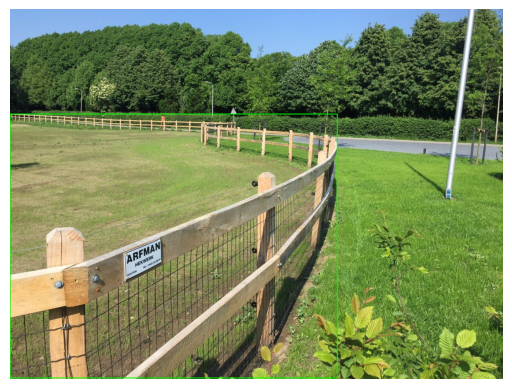

In [8]:
import cv2
import matplotlib.pyplot as plt
import json
import os
import random


with open('/home/sagemaker-user/combined_dataset/train/annotations.json', 'r') as f:
    coco_data = json.load(f)

images = coco_data['images']
annotations = coco_data['annotations']

image_annotations = {}
for anno in annotations:
    image_annotations.setdefault(anno['image_id'], []).append(anno)


train_images_path = '/home/sagemaker-user/combined_dataset/train/images/'


random_img_data = random.choice(images)
img_id = random_img_data['id']
img_file_name = random_img_data['file_name']


print(f"Random Image Selected: {img_file_name}, Image ID: {img_id}")

if img_file_name.startswith('images/'):
    img_file_name = img_file_name[len('images/'):]


img_path_train = os.path.join(train_images_path, img_file_name)


if not os.path.exists(img_path_train):
    print(f"Warning: Image {img_file_name} does not exist in the 'train' folder. Skipping annotation.")
else:
    print(f"Image path: {img_path_train}")

    img = cv2.imread(img_path_train)

    if img is None:
        print(f"Warning: Failed to load image {img_path_train}")
    else:
        img_annotations = image_annotations.get(img_id, [])
        print(f"Number of annotations for the image: {len(img_annotations)}")

        for anno in img_annotations:
            x, y, w, h = anno['bbox']
            cv2.rectangle(img, (int(x), int(y)), (int(x + w), int(y + h)), (0, 255, 0), 2)

        cv2.imwrite('annotated_image.jpg', img)  # Save image with bounding boxes

        img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

        plt.imshow(img_rgb)
        plt.axis('off')
        plt.show()


In [9]:
from detectron2.data import DatasetCatalog

if "my_dataset_train" in DatasetCatalog:
    DatasetCatalog.remove("my_dataset_train")


In [6]:
from detectron2.data.datasets import register_coco_instances

# Register training dataset
register_coco_instances(
    "my_dataset_train",  
    {}, 
    "/home/sagemaker-user/combined_dataset/train/annotations.json",  
    "/home/sagemaker-user/combined_dataset/train"  
)

# Register validation dataset
register_coco_instances(
    "my_dataset_val",  
    {}, 
    "/home/sagemaker-user/combined_dataset/val/annotations.json",  
    "/home/sagemaker-user/combined_dataset/val"  
)

print("Datasets registered: my_dataset_train and my_dataset_val")


Datasets registered: my_dataset_train and my_dataset_val


**Checking registered dataset**

In [11]:

train_metadata = MetadataCatalog.get("my_dataset_train")

# Retrieve the dataset again
train_dataset_dicts = DatasetCatalog.get("my_dataset_train")

# Print metadata and dataset information
print(f"Dataset name: my_dataset_train")
print(f"Number of samples: {len(train_dataset_dicts)}")
print(f"Classes: {train_metadata.thing_classes}")


[01/12 02:41:48 d2.data.datasets.coco]: Loaded 2086 images in COCO format from /home/sagemaker-user/combined_dataset/train/annotations.json
Dataset name: my_dataset_train
Number of samples: 2086
Classes: ['tree', 'tree', 'fence', 'Fence', '-dog-bush-chair-human-rock-sprinkler-trash-tree-pole--r3sd', 'bush', 'chair', 'dog', 'human', 'pole', 'rock', 'sprinkler', 'trash', 'tree', 'Furniture', 'Barstools', 'Firepit', 'Outdoor Accent Chair', 'Outdoor Chaise', 'Outdoor Coffee Table', 'Outdoor Dining Chairs', 'Outdoor Dining Table', 'Outdoor End Tables', 'Outdoor Sofa', 'Plants', 'Umbrella']


In [12]:
val_metadata = MetadataCatalog.get("my_dataset_val")

# Retrieve the dataset again
val_dataset_dicts = DatasetCatalog.get("my_dataset_val")

# Print metadata and dataset information
print(f"Dataset name: val")
print(f"Number of samples: {len(val_dataset_dicts)}")
print(f"Classes: {val_metadata.thing_classes}")

[01/12 02:41:52 d2.data.datasets.coco]: Loaded 203 images in COCO format from /home/sagemaker-user/combined_dataset_val/val/annotations.json
Dataset name: val
Number of samples: 203
Classes: ['tree', 'tree', 'fence', 'Fence', 'mower', 'Mower', 'Person', 'Furniture', 'Barstools', 'Firepit', 'Outdoor Accent Chair', 'Outdoor Chaise', 'Outdoor Coffee Table', 'Outdoor Dining Chairs', 'Outdoor Dining Table', 'Outdoor End Tables', 'Outdoor Sofa', 'Plants', 'Umbrella']


**Visualizing**

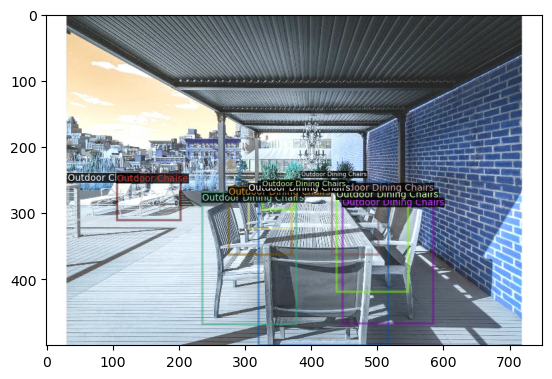

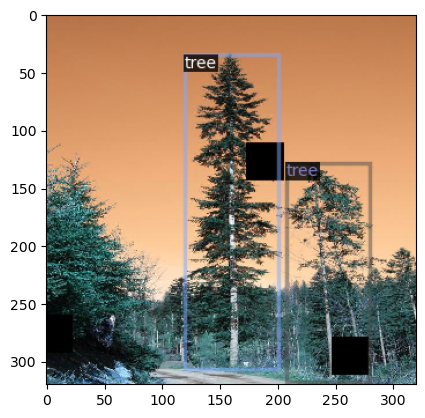

In [13]:
import random
import cv2
import matplotlib.pyplot as plt
from detectron2.utils.visualizer import Visualizer
import os

# Assuming 'train_dataset_dicts' and 'train_metadata' are already defined

for d in random.sample(train_dataset_dicts, 2):
    img_path = d["file_name"]
    
    img_path = os.path.join("/home/sagemaker-user/combined_dataset/train/images", img_path.split('images/')[-1])

    if not os.path.exists(img_path):
        print(f"Warning: {img_path} not found!")
        continue

    # Load the image
    img = cv2.imread(img_path)
    if img is None:
        print(f"Warning: Failed to load image {img_path}")
        continue


    visualizer = Visualizer(img[:, :, ::-1], metadata=train_metadata, scale=0.5)
    vis = visualizer.draw_dataset_dict(d)
    plt.imshow(vis.get_image()[:, :, ::-1])
    plt.show()


**Model Training**

In [7]:
import os
from detectron2.config import get_cfg
from detectron2 import model_zoo
from detectron2.engine import DefaultTrainer
from detectron2.evaluation import COCOEvaluator
from detectron2.data import build_detection_test_loader

# Set up the configuration for the model
cfg = get_cfg()
# Load a pre-defined model from the Detectron2 model zoo
cfg.merge_from_file(model_zoo.get_config_file("COCO-InstanceSegmentation/mask_rcnn_R_50_FPN_3x.yaml"))

# Set datasets
cfg.DATASETS.TRAIN = ("my_dataset_train",)
cfg.DATASETS.TEST = ()  # or "my_test_dataset" for evaluation
cfg.DATALOADER.NUM_WORKERS = 2

# Set the model weights (pretrained COCO weights)
cfg.MODEL.WEIGHTS = model_zoo.get_checkpoint_url("COCO-InstanceSegmentation/mask_rcnn_R_50_FPN_3x.yaml")

# Disable mask prediction (for object detection)
cfg.MODEL.MASK_ON = False  # Turn off mask prediction for bounding box detection

# Training parameters
cfg.SOLVER.IMS_PER_BATCH = 4
cfg.SOLVER.BASE_LR = 0.00025  
cfg.SOLVER.MAX_ITER = 1000    
cfg.MODEL.ROI_HEADS.BATCH_SIZE_PER_IMAGE = 128 
cfg.MODEL.ROI_HEADS.NUM_CLASSES = 26

# Output directory
cfg.OUTPUT_DIR = "./output"
os.makedirs(cfg.OUTPUT_DIR, exist_ok=True)

# Define a custom trainer class with an evaluator
class MyTrainer(DefaultTrainer):
    @classmethod
    def build_evaluator(cls, cfg, dataset_name):
        # Create a COCOEvaluator for evaluation
        return None

trainer = MyTrainer(cfg)
trainer.resume_or_load(resume=False)
trainer.train()


[01/12 12:13:58 d2.engine.defaults]: Model:
GeneralizedRCNN(
  (backbone): FPN(
    (fpn_lateral2): Conv2d(256, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output2): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (fpn_lateral3): Conv2d(512, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output3): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (fpn_lateral4): Conv2d(1024, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output4): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (fpn_lateral5): Conv2d(2048, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output5): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (top_block): LastLevelMaxPool()
    (bottom_up): ResNet(
      (stem): BasicStem(
        (conv1): Conv2d(
          3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False
          (norm): FrozenBatchNorm2d(num_features=64, eps=1e-05)
        )
      )
      (res

Skip loading parameter 'roi_heads.box_predictor.cls_score.weight' to the model due to incompatible shapes: (81, 1024) in the checkpoint but (27, 1024) in the model! You might want to double check if this is expected.
Skip loading parameter 'roi_heads.box_predictor.cls_score.bias' to the model due to incompatible shapes: (81,) in the checkpoint but (27,) in the model! You might want to double check if this is expected.
Skip loading parameter 'roi_heads.box_predictor.bbox_pred.weight' to the model due to incompatible shapes: (320, 1024) in the checkpoint but (104, 1024) in the model! You might want to double check if this is expected.
Skip loading parameter 'roi_heads.box_predictor.bbox_pred.bias' to the model due to incompatible shapes: (320,) in the checkpoint but (104,) in the model! You might want to double check if this is expected.
Some model parameters or buffers are not found in the checkpoint:
roi_heads.box_predictor.bbox_pred.{bias, weight}
roi_heads.box_predictor.cls_score.{bi

[01/12 12:13:59 d2.engine.train_loop]: Starting training from iteration 0


/opt/conda/lib/python3.11/site-packages/torch/functional.py:534: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at ../aten/src/ATen/native/TensorShape.cpp:3595.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]


[01/12 12:14:07 d2.utils.events]:  eta: 0:05:16  iter: 19  total_loss: 4.077  loss_cls: 3.161  loss_box_reg: 0.7737  loss_rpn_cls: 0.05327  loss_rpn_loc: 0.05059    time: 0.3390  last_time: 0.2952  data_time: 0.0518  last_data_time: 0.0034   lr: 4.9953e-06  max_mem: 4868M


2025-01-12 12:14:07.988462: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2025-01-12 12:14:08.010199: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2025-01-12 12:14:08.016851: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-01-12 12:14:08.033240: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: SSE4.1 SSE4.2 AVX AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


[01/12 12:14:17 d2.utils.events]:  eta: 0:05:22  iter: 39  total_loss: 3.984  loss_cls: 3.044  loss_box_reg: 0.8632  loss_rpn_cls: 0.03988  loss_rpn_loc: 0.04057    time: 0.3381  last_time: 0.3635  data_time: 0.0407  last_data_time: 0.0809   lr: 9.9902e-06  max_mem: 4869M
[01/12 12:14:24 d2.utils.events]:  eta: 0:05:09  iter: 59  total_loss: 3.814  loss_cls: 2.819  loss_box_reg: 0.728  loss_rpn_cls: 0.04945  loss_rpn_loc: 0.0433    time: 0.3397  last_time: 0.3302  data_time: 0.0600  last_data_time: 0.0101   lr: 1.4985e-05  max_mem: 4869M
[01/12 12:14:31 d2.utils.events]:  eta: 0:04:57  iter: 79  total_loss: 3.398  loss_cls: 2.436  loss_box_reg: 0.7615  loss_rpn_cls: 0.04329  loss_rpn_loc: 0.04464    time: 0.3417  last_time: 0.2933  data_time: 0.0552  last_data_time: 0.0105   lr: 1.998e-05  max_mem: 4869M
[01/12 12:14:37 d2.utils.events]:  eta: 0:04:49  iter: 99  total_loss: 2.944  loss_cls: 2.064  loss_box_reg: 0.8532  loss_rpn_cls: 0.05195  loss_rpn_loc: 0.04464    time: 0.3384  last_

In [8]:
from detectron2.evaluation import COCOEvaluator, inference_on_dataset
from detectron2.data import build_detection_test_loader

evaluator = COCOEvaluator("my_dataset_train", cfg, False, output_dir=cfg.OUTPUT_DIR)
val_loader = build_detection_test_loader(cfg, "my_dataset_train")
print(inference_on_dataset(trainer.model, val_loader, evaluator))


WARNING [01/12 12:19:36 d2.evaluation.coco_evaluation]: COCO Evaluator instantiated using config, this is deprecated behavior. Please pass in explicit arguments instead.
[01/12 12:19:36 d2.data.datasets.coco]: Loaded 2086 images in COCO format from /home/sagemaker-user/combined_dataset/train/annotations.json
[01/12 12:19:37 d2.data.dataset_mapper]: [DatasetMapper] Augmentations used in inference: [ResizeShortestEdge(short_edge_length=(800, 800), max_size=1333, sample_style='choice')]
[01/12 12:19:37 d2.data.common]: Serializing the dataset using: <class 'detectron2.data.common._TorchSerializedList'>
[01/12 12:19:37 d2.data.common]: Serializing 2086 elements to byte tensors and concatenating them all ...
[01/12 12:19:37 d2.data.common]: Serialized dataset takes 1.61 MiB
[01/12 12:19:37 d2.evaluation.evaluator]: Start inference on 2086 batches
[01/12 12:19:38 d2.evaluation.evaluator]: Inference done 11/2086. Dataloading: 0.0010 s/iter. Inference: 0.0361 s/iter. Eval: 0.0003 s/iter. Total

In [36]:
import os
import yaml

# Path to save the configuration
config_dir = "model_cfg/"
config_yaml_path = os.path.join(config_dir, "config.yaml")

# Ensure the directory exists
os.makedirs(config_dir, exist_ok=True)

# Save the configuration to a config.yaml file
with open(config_yaml_path, 'w') as file:
    yaml.dump(cfg, file)

print(f"Configuration saved to {config_yaml_path}")

Configuration saved to model_cfg/config.yaml


**TensorBoard Visualization**

In [37]:
import psutil

def free_port(port):
    for proc in psutil.process_iter(attrs=["pid", "name", "connections"]):
        try:
            connections = proc.info.get("connections", [])
            if connections is None:  # Skip processes without connections
                continue
            for conn in connections:
                if conn.laddr.port == port:
                    print(f"Killing process {proc.info['name']} (PID: {proc.info['pid']}) using port {port}")
                    proc.terminate()
                    proc.wait()  
                    return
        except (psutil.NoSuchProcess, psutil.AccessDenied):
            continue
    print(f"No process found using port {port}.")

# Free ports 6006 and 6007
free_port(6006)
free_port(6007)


Killing process tensorboard (PID: 1694) using port 6006
No process found using port 6007.


In [38]:
# Load the TensorBoard extension
%load_ext tensorboard

# Replace $OUTPUT_DIR_PATH with the actual path to your logs
#output_dir = "/home/sagemaker-user/detectron2_output"  # Update with your path
%tensorboard --logdir $output_dir

The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


**Predictor Initialization**

In [39]:
from detectron2.engine import DefaultPredictor

try:
    model_weights_path = os.path.join(cfg.OUTPUT_DIR, "model_final.pth")
    cfg.MODEL.WEIGHTS = model_weights_path  
    cfg.MODEL.ROI_HEADS.SCORE_THRESH_TEST = 0.5  
    predictor = DefaultPredictor(cfg)
    print("Predictor initialized successfully.")
except Exception as e:
    print(f"Error initializing the predictor: {e}")


[01/12 12:59:41 d2.checkpoint.detection_checkpoint]: [DetectionCheckpointer] Loading from ./output/model_final.pth ...


/opt/conda/lib/python3.11/site-packages/fvcore/common/checkpoint.py:252: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  return torch.load(f, map_location=torch.device("cpu"))

Predictor initialized successfully.


**Evaluation**

In [ ]:
import cv2
import random
import os
from detectron2.utils.visualizer import Visualizer, ColorMode
import matplotlib.pyplot as plt
from detectron2.data import DatasetCatalog, MetadataCatalog
from detectron2.engine import DefaultPredictor



dataset_valid = DatasetCatalog.get("my_dataset_val")
metadata = MetadataCatalog.get("my_dataset_val")


random_entry = random.choice(dataset_valid)
image_path = random_entry["file_name"]


if not os.path.exists(image_path):
    print(f"File not found: {image_path}")
    exit()


img = cv2.imread(image_path)


if img is None:
    print(f"Failed to load image: {image_path}")
    exit()


outputs = predictor(img)


visualizer = Visualizer(
    img[:, :, ::-1],
    metadata=metadata, 
    scale=0.8, 
    instance_mode=ColorMode.IMAGE_BW
)
out = visualizer.draw_instance_predictions(outputs["instances"].to("cpu"))


result_image = out.get_image()[:, :, ::-1]


plt.figure(figsize=(12, 8))
plt.imshow(result_image)
plt.axis("off")
plt.title("Random Prediction")
plt.show()


**PREDICTING ALL IMAGES IN A TRAINING SET**

In [74]:
import cv2
import random
from detectron2.utils.visualizer import Visualizer, ColorMode
import matplotlib.pyplot as plt
from detectron2.data import DatasetCatalog, MetadataCatalog


detected_objects_per_image = []


dataset_train = DatasetCatalog.get(cfg.DATASETS.TRAIN[0])
metadata = MetadataCatalog.get(cfg.DATASETS.TRAIN[0])

# Define the target size for resizing (adjust the dimensions as needed)
target_width = 640  
target_height = 480  


for idx, entry in enumerate(dataset_train):
    # Load the image
    img = cv2.imread(entry["file_name"])

    # Resize the image
    img_resized = cv2.resize(img, (target_width, target_height))  # Resize to the target dimensions
    # print(f"Image {entry['file_name']} resized to {img_resized.shape[1]}x{img_resized.shape[0]}")

    
    outputs = predictor(img_resized)

   
    instances = outputs["instances"]
    detected_class_indexes = instances.pred_classes
    prediction_boxes = instances.pred_boxes

    class_catalog = metadata.thing_classes

    
    class_name_list = []
    for idx, coordinates in enumerate(prediction_boxes):
        class_index = detected_class_indexes[idx]
        class_name = class_catalog[class_index]
        class_name_list.append(class_name)

    
    detected_objects_per_image.append({
        'image': entry["file_name"],  
        'detected_objects': class_name_list  
    })


print("\nDetected objects in all images:")
for result in detected_objects_per_image:
    print(result)


[01/12 14:13:51 d2.data.datasets.coco]: Loaded 2086 images in COCO format from /home/sagemaker-user/combined_dataset/train/annotations.json

Detected objects in all images:
{'image': '/home/sagemaker-user/combined_dataset/train/images/tree28_jpeg.rf.08d4b814f7766128605a3408a605e4b9.jpg', 'detected_objects': ['tree']}
{'image': '/home/sagemaker-user/combined_dataset/train/images/tree96_jpeg.rf.1143fd8dd83f59d49bff4559aed301c4.jpg', 'detected_objects': ['tree']}
{'image': '/home/sagemaker-user/combined_dataset/train/images/tree52_jpeg.rf.099d5b9323895e92fff051efda74d737.jpg', 'detected_objects': ['tree']}
{'image': '/home/sagemaker-user/combined_dataset/train/images/tree72_jpeg.rf.0969a7bdf43bd292e8577a37648ffe20.jpg', 'detected_objects': ['tree']}
{'image': '/home/sagemaker-user/combined_dataset/train/images/tree96_jpeg.rf.0466d7e2e2200b80c5026441ef3856e2.jpg', 'detected_objects': ['tree']}
{'image': '/home/sagemaker-user/combined_dataset/train/images/tree86_jpeg.rf.10fdf5dfc9d5ff207a15

In [73]:
print(f"Number of images processed: {len(detected_objects_per_image)}")

Number of images processed: 2086


**Process the predicted class and store the output in a file**

In [82]:

import pandas as pd
import numpy as np
import ast

results = []


object_limits = {
    "barstools": 5,
    "bush": 4,
    "chair": 5,
    "dog": 3,
    "fence": 1,
    "firepit": 3,
    "furniture": 6,
    "human": 5,
    "outdoor_accent_chair": 5,
    "outdoor_chaise": 5,
    "outdoor_coffee_table": 5,
    "outdoor_dining_chairs": 6,
    "outdoor_dining_table": 4,
    "outdoor_end_tables": 5,
    "outdoor_sofa": 3,
    "plants": 6,
    "pole": 5,
    "rock": 20,
    "sprinkler": 5,
    "trash": 5,
    "tree": 2,
    "umbrella": 5
}


normalization_map = {
    "barstools": "barstools",
    "bush": "bush",
    "chair": "chair",
    "chairs": "chair",
    "dog": "dog",
    "fence": "fence",
    "firepit": "firepit",
    "furniture": "furniture",
    "human": "human",
    "outdoor accent chair": "outdoor_accent_chair",
    "outdoor accent chairs": "outdoor_accent_chair",
    "outdoor chaise": "outdoor_chaise",
    "outdoor coffee table": "outdoor_coffee_table",
    "outdoor dining chairs": "outdoor_dining_chairs",
    "outdoor dining table": "outdoor_dining_table",
    "outdoor end tables": "outdoor_end_tables",
    "outdoor sofa": "outdoor_sofa",
    "plants": "plants",
    "pole": "pole",
    "rock": "rock",
    "sprinkler": "sprinkler",
    "trash": "trash",
    "tree": "tree",
    "umbrella": "umbrella"
}

def apply_quantifiers_and_compute_facet_scores(class_name_list):
    detected_objects = {name: 0 for name in object_limits.keys()}

    # Count occurrences of each object (including plural handling and case insensitivity)
    for class_name in class_name_list:
        normalized_name = class_name.strip().lower()  
        normalized_name = normalized_name.replace("_", " ")  
        normalized_name = normalization_map.get(normalized_name, normalized_name)  
        
        if normalized_name in detected_objects:
            detected_objects[normalized_name] += 1
        else:
            print(f"Warning: Unrecognized object '{class_name}' (normalized: '{normalized_name}')")

    print(f"\nDetected objects after counting: {detected_objects}")  

    
    for obj_name, count in detected_objects.items():
        if count > object_limits[obj_name]:
            print(f"Excluding image: Too many {obj_name}s detected (exceeds limit).")
            return None  # Drop the image
    
    facet_scores = compute_facet_scores(detected_objects)
    
    # Calculate Aavg (Average Aggregate Score) for the image
    total_facet_scores = 0
    total_objects = 0
    for obj_name, scores in facet_scores.items():
        facet_average = np.mean(list(scores.values()))  
        total_facet_scores += facet_average * detected_objects[obj_name]  
        total_objects += detected_objects[obj_name]

    Aavg = total_facet_scores / total_objects if total_objects > 0 else 0
    return detected_objects, facet_scores, Aavg


def compute_facet_scores(detected_objects):
    # Dictionary to store facet scores for each object class
    facet_scores = {}

    # Loop over the detected objects and assign facet scores
    for obj, count in detected_objects.items():
        normalized_name = obj.lower()
        normalized_name = normalization_map.get(normalized_name, normalized_name)  # Normalize class name

        # Assign reasonable facet scores based on object type
        if normalized_name == "barstools":
            facet_scores[normalized_name] = {"plausibility": 0.8, "typicality": 0.85, "remarkability": 0.6, "salience": 0.75}
        elif normalized_name == "bush":
            facet_scores[normalized_name] = {"plausibility": 0.9, "typicality": 0.85, "remarkability": 0.7, "salience": 0.8}
        elif normalized_name == "chair":
            facet_scores[normalized_name] = {"plausibility": 0.85, "typicality": 0.9, "remarkability": 0.75, "salience": 0.8}
        elif normalized_name == "dog":
            facet_scores[normalized_name] = {"plausibility": 0.9, "typicality": 0.95, "remarkability": 0.85, "salience": 0.9}
        elif normalized_name == "fence":
            facet_scores[normalized_name] = {"plausibility": 0.85, "typicality": 0.8, "remarkability": 0.6, "salience": 0.7}
        elif normalized_name == "firepit":
            facet_scores[normalized_name] = {"plausibility": 0.7, "typicality": 0.75, "remarkability": 0.8, "salience": 0.75}
        elif normalized_name == "furniture":
            facet_scores[normalized_name] = {"plausibility": 0.8, "typicality": 0.9, "remarkability": 0.7, "salience": 0.8}
        elif normalized_name == "human":
            facet_scores[normalized_name] = {"plausibility": 0.95, "typicality": 0.9, "remarkability": 0.95, "salience": 0.9}
        elif normalized_name == "tree":
            facet_scores[normalized_name] = {"plausibility": 0.9, "typicality": 0.85, "remarkability": 0.85, "salience": 0.8}
        elif normalized_name == "plants":
            facet_scores[normalized_name] = {"plausibility": 0.8, "typicality": 0.75, "remarkability": 0.7, "salience": 0.75}
        elif normalized_name == "pole":
            facet_scores[normalized_name] = {"plausibility": 0.75, "typicality": 0.7, "remarkability": 0.5, "salience": 0.6}
        elif normalized_name == "rock":
            facet_scores[normalized_name] = {"plausibility": 0.7, "typicality": 0.65, "remarkability": 0.6, "salience": 0.7}
        elif normalized_name == "sprinkler":
            facet_scores[normalized_name] = {"plausibility": 0.8, "typicality": 0.75, "remarkability": 0.6, "salience": 0.7}
        elif normalized_name == "trash":
            facet_scores[normalized_name] = {"plausibility": 0.85, "typicality": 0.9, "remarkability": 0.6, "salience": 0.75}
        elif normalized_name == "umbrella":
            facet_scores[normalized_name] = {"plausibility": 0.8, "typicality": 0.75, "remarkability": 0.7, "salience": 0.75}
        elif normalized_name == "outdoor_accent_chair":
            facet_scores[normalized_name] = {"plausibility": 0.85, "typicality": 0.9, "remarkability": 0.7, "salience": 0.75}
        elif normalized_name == "outdoor_chaise":
            facet_scores[normalized_name] = {"plausibility": 0.8, "typicality": 0.85, "remarkability": 0.6, "salience": 0.7}
        elif normalized_name == "outdoor_coffee_table":
            facet_scores[normalized_name] = {"plausibility": 0.85, "typicality": 0.9, "remarkability": 0.7, "salience": 0.75}
        elif normalized_name == "outdoor_dining_chairs":
            facet_scores[normalized_name] = {"plausibility": 0.85, "typicality": 0.9, "remarkability": 0.7, "salience": 0.75}
        elif normalized_name == "outdoor_dining_table":
            facet_scores[normalized_name] = {"plausibility": 0.8, "typicality": 0.85, "remarkability": 0.7, "salience": 0.75}
        elif normalized_name == "outdoor_end_tables":
            facet_scores[normalized_name] = {"plausibility": 0.8, "typicality": 0.85, "remarkability": 0.6, "salience": 0.7}
        elif normalized_name == "outdoor_sofa":
            facet_scores[normalized_name] = {"plausibility": 0.85, "typicality": 0.9, "remarkability": 0.7, "salience": 0.75}

    return facet_scores

def label_images_with_commonsense(df):
    """
    Apply commonsense logic to label the images as 'Outdoor' or 'Not Outdoor'
    based on detected objects and Aavg.
    """
    
    # Ensure 'detected_objects' is a dictionary and extract counts for each object
    for obj in object_limits.keys():
        df[obj] = df['detected_objects'].apply(lambda x: x.get(obj, 0) if isinstance(x, dict) else 0)

    # Define a function to check for specific conditions
    def is_garden(row):
        return (
            # Condition 1: High Aavg and presence of plants, trees, or bushes
            (row['Aavg'] > 0.75 and (row['plants'] > 3 or row['tree'] > 2 or row['bush'] > 3)) or
            # Condition 2: Presence of garden-related furniture
            any(row[furniture] > 0 for furniture in ['outdoor_dining_table', 'outdoor_sofa', 'outdoor_accent_chair',
                                                      'chair', 'outdoor_chaise', 'outdoor_coffee_table',
                                                      'outdoor_dining_chairs', 'outdoor_end_tables']) or
            # Condition 3: Presence of rocks and sprinklers
            (row['rock'] > 1 or row['sprinkler'] > 0) or
            # Condition 4: Presence of barstools, firepit, or umbrella
            (row['barstools'] > 0 or row['firepit'] > 1 or row['umbrella'] > 1) or
            # Condition 5: High number of plants
            (row['plants'] > 5) or
            # Condition 6: Presence of garden pathways (stones, gravel)
            (row['rock'] > 2) or
            # Condition 7: Presence of garden decorations
            (row['furniture'] > 2 and row['outdoor_accent_chair'] > 0) or
            # Condition 8: Presence of water features (fountains, ponds)
            (row['sprinkler'] > 1) or
            # Condition 9: Presence of flowers
            (row['plants'] > 2 and row['tree'] < 2) or
            # Condition 10: Garden lighting or other decorative lights
            (row['outdoor_dining_table'] > 0 and row['outdoor_accent_chair'] > 0) or
            # Condition 11: Presence of trash
            (row['trash'] > 0 and row['plants'] < 2) or
            # Condition 12: Presence of humans
            (row['human'] > 1 and (row['plants'] > 2 or row['tree'] > 1)) or
            # Condition 13: Presence of dogs or animals
            (row['dog'] > 0 and (row['plants'] > 1 or row['tree'] > 1)) or
            # Condition 14: Presence of fences
            (row['fence'] > 0) or
            # Condition 15: Presence of chairs or furniture
            (row['chair'] > 0) or
            (row['plants'] < 5 and row['plants'] > 0) or
            (row['tree'] < 3 and row['tree'] > 0) or
            # Condition 16: Presence of large outdoor furniture
            (row['outdoor_sofa'] > 0 or row['chair'] > 0) or
            # Condition 17: Presence of outdoor dining sets
            (row['outdoor_dining_table'] > 0 and row['outdoor_dining_chairs'] > 0) or
            # Condition 18: Presence of large furniture items like outdoor accent chairs or sofas
            (row['outdoor_chaise'] > 0 or row['outdoor_accent_chair'] > 0)
        )

    # Apply commonsense logic to label as 'Garden' or 'Not Garden'
    df['class'] = df.apply(lambda row: 'Garden' if is_garden(row) else 'Not Garden', axis=1)

    # Additional logic for exclusions (e.g., too much trash = 'Not Outdoor')
    df['class'] = df.apply(lambda row: 'Not Outdoor' if row['trash'] > 2 else row['class'], axis=1)

    return df

# Process each image
results = []
for idx, image_data in enumerate(detected_objects_per_image):
    detected_objects = image_data['detected_objects']
    print(f"\nProcessing image {idx + 1} with detected objects: {detected_objects}")
    
    result = apply_quantifiers_and_compute_facet_scores(detected_objects)
    
    if result is not None:
        detected_objects, facet_scores, Aavg = result
        print(f"Detected objects after applying quantifier limits: {detected_objects}")
        print(f"Calculated Aavg for this image: {round(Aavg, 3)}")
        Aavg = round(Aavg, 3)
        
        results.append({
            'image': f"image_{idx + 1}",
            'detected_objects': detected_objects,
            'facet_scores': facet_scores,
            'Aavg': Aavg,
            'excluded': False,
            **detected_objects  # Unpack the detected objects directly
        })
    else:
        print(f"Image {idx + 1} excluded due to exceeding quantifier limits.")
        results.append({
            'image': f"image_{idx + 1}",
            'detected_objects': None,
            'facet_scores': None,
            'Aavg': None,
            'excluded': True,
            **{obj: 0 for obj in object_limits.keys()}  # Set all object counts to 0 for excluded images
        })


df_results = pd.DataFrame(results)


df_results = label_images_with_commonsense(df_results)


df_results['Aavg'] = df_results['Aavg'].apply(lambda x: f"{x:.3f}" if pd.notnull(x) else x)


df_results['detected_objects'] = df_results['detected_objects'].apply(lambda x: str(x) if x is not None else '')
df_results['facet_scores'] = df_results['facet_scores'].apply(lambda x: str(x) if x is not None else '')


columns_to_save = ['image', 'Aavg', 'excluded', 'class'] + list(object_limits.keys())


df_results[columns_to_save].to_csv("image_detection_results_with_labels.csv", index=False)


print("\nFinal results:")
print(df_results[columns_to_save])




Processing image 1 with detected objects: ['tree']

Detected objects after counting: {'barstools': 0, 'bush': 0, 'chair': 0, 'dog': 0, 'fence': 0, 'firepit': 0, 'furniture': 0, 'human': 0, 'outdoor_accent_chair': 0, 'outdoor_chaise': 0, 'outdoor_coffee_table': 0, 'outdoor_dining_chairs': 0, 'outdoor_dining_table': 0, 'outdoor_end_tables': 0, 'outdoor_sofa': 0, 'plants': 0, 'pole': 0, 'rock': 0, 'sprinkler': 0, 'trash': 0, 'tree': 1, 'umbrella': 0}
Detected objects after applying quantifier limits: {'barstools': 0, 'bush': 0, 'chair': 0, 'dog': 0, 'fence': 0, 'firepit': 0, 'furniture': 0, 'human': 0, 'outdoor_accent_chair': 0, 'outdoor_chaise': 0, 'outdoor_coffee_table': 0, 'outdoor_dining_chairs': 0, 'outdoor_dining_table': 0, 'outdoor_end_tables': 0, 'outdoor_sofa': 0, 'plants': 0, 'pole': 0, 'rock': 0, 'sprinkler': 0, 'trash': 0, 'tree': 1, 'umbrella': 0}
Calculated Aavg for this image: 0.85

Processing image 2 with detected objects: ['tree']

Detected objects after counting: {'bars

In [83]:
print(df_results.columns)

Index(['image', 'detected_objects', 'facet_scores', 'Aavg', 'excluded',
       'barstools', 'bush', 'chair', 'dog', 'fence', 'firepit', 'furniture',
       'human', 'outdoor_accent_chair', 'outdoor_chaise',
       'outdoor_coffee_table', 'outdoor_dining_chairs', 'outdoor_dining_table',
       'outdoor_end_tables', 'outdoor_sofa', 'plants', 'pole', 'rock',
       'sprinkler', 'trash', 'tree', 'umbrella', 'class'],
      dtype='object')


In [86]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Assuming df_results is your DataFrame with the results

# Select features and target variable
features = list(object_limits.keys()) + ['Aavg']
target = 'class'

# Prepare X (features) and y (target)
X = df_results[features]
y = df_results[target]

# Convert Aavg to numeric, replacing any non-numeric values with NaN
X['Aavg'] = pd.to_numeric(X['Aavg'], errors='coerce')

# Handle any missing values 
X = X.dropna()  # Option 1: Drop rows with missing values
# Or
# X = X.fillna(X.mean())  # Option 2: Impute missing values with mean

# Update y to match X after handling missing values
y = y.loc[X.index]


y = y.map({'Garden': 1, 'Not Garden': 0, 'Not Outdoor': 0})


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)


print("\nFirst few rows of X:")
print(X.head())
print("\nFirst few rows of y:")
print(y.head())


print("\nClass distribution:")
print(y.value_counts(normalize=True))


X_train shape: (1484, 23)
X_test shape: (371, 23)
y_train shape: (1484,)
y_test shape: (371,)

First few rows of X:
   barstools  bush  chair  dog  fence  firepit  furniture  human  \
0          0     0      0    0      0        0          0      0   
1          0     0      0    0      0        0          0      0   
2          0     0      0    0      0        0          0      0   
3          0     0      0    0      0        0          0      0   
4          0     0      0    0      0        0          0      0   

   outdoor_accent_chair  outdoor_chaise  ...  outdoor_end_tables  \
0                     0               0  ...                   0   
1                     0               0  ...                   0   
2                     0               0  ...                   0   
3                     0               0  ...                   0   
4                     0               0  ...                   0   

   outdoor_sofa  plants  pole  rock  sprinkler  trash  tree  umbre

/tmp/ipykernel_1240/3028378881.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['Aavg'] = pd.to_numeric(X['Aavg'], errors='coerce')


**TESTING**

In [50]:
print(df_results)


           image                                   detected_objects  \
0        image_1  {"barstools": 0, "bush": 0, "chair": 0, "dog":...   
1        image_2  {"barstools": 0, "bush": 0, "chair": 0, "dog":...   
2        image_3  {"barstools": 0, "bush": 0, "chair": 0, "dog":...   
3        image_4  {"barstools": 0, "bush": 0, "chair": 0, "dog":...   
4        image_5  {"barstools": 0, "bush": 0, "chair": 0, "dog":...   
...          ...                                                ...   
2081  image_2082  {"barstools": 0, "bush": 0, "chair": 0, "dog":...   
2082  image_2083  {"barstools": 0, "bush": 0, "chair": 0, "dog":...   
2083  image_2084  {"barstools": 0, "bush": 0, "chair": 0, "dog":...   
2084  image_2085  {"barstools": 0, "bush": 0, "chair": 0, "dog":...   
2085  image_2086  {"barstools": 0, "bush": 0, "chair": 0, "dog":...   

                                           facet_scores   Aavg excluded  \
0     {"barstools": {"plausibility": 0.8, "typicalit...  0.850    False 

**Training the Decision Tree Classifier**

**Using Aavg and object counts  as features, we train the Decision Tree Classifier to predict the target variable (class).**

In [89]:
import joblib
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import classification_report, accuracy_score
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np




features = list(object_limits.keys()) + ['Aavg']
target = 'class'


X = df_results[features].copy() 
y = df_results[target]


print("Feature data types:")
print(X.dtypes)


for column in X.columns:
    X[column] = X[column].replace('N/A', np.nan)
    X[column] = pd.to_numeric(X[column], errors='coerce')


X = X.fillna(X.mean())


y = y.map({'Garden': 1, 'Not Garden': 0, 'Not Outdoor': 0})


print("\nFirst few rows of features (X):")
print(X.head())
print("\nFirst few rows of target (y):")
print(y.head())


print("\nDistribution of target variable:")
print(y.value_counts(normalize=True))


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)


clf = DecisionTreeClassifier(random_state=42, max_depth=5, criterion='gini')
clf.fit(X_train, y_train)


y_pred = clf.predict(X_test)


print("\nClassification Report:")
print(classification_report(y_test, y_pred))

print(f"Accuracy: {accuracy_score(y_test, y_pred):.2f}")


scores = cross_val_score(clf, X, y, cv=5)
print(f"\nCross-validation scores: {scores}")
print(f"Mean CV score: {scores.mean():.2f}")


plt.figure(figsize=(20, 10))
class_names = ['Not Garden', 'Garden']  
plot_tree(clf, feature_names=X.columns, class_names=class_names, filled=True)
plt.savefig('decision_tree.png')  
plt.close()  


joblib.dump(clf, 'decision_tree_model.pkl')
print("Decision Tree Model saved successfully!")


feature_importance = pd.DataFrame({'feature': X.columns, 'importance': clf.feature_importances_})
print("\nDecision Tree Feature Importances:")
print(feature_importance.sort_values('importance', ascending=False))

print("\nAnalysis complete. Check the output and generated decision tree image for insights.")


Feature data types:
barstools                 int64
bush                      int64
chair                     int64
dog                       int64
fence                     int64
firepit                   int64
furniture                 int64
human                     int64
outdoor_accent_chair      int64
outdoor_chaise            int64
outdoor_coffee_table      int64
outdoor_dining_chairs     int64
outdoor_dining_table      int64
outdoor_end_tables        int64
outdoor_sofa              int64
plants                    int64
pole                      int64
rock                      int64
sprinkler                 int64
trash                     int64
tree                      int64
umbrella                  int64
Aavg                     object
dtype: object

First few rows of features (X):
   barstools  bush  chair  dog  fence  firepit  furniture  human  \
0          0     0      0    0      0        0          0      0   
1          0     0      0    0      0        0          0    

In [90]:
print(df.columns)

Index(['image', 'detected_objects', 'excluded', 'class'], dtype='object')


**Testing**

In [92]:
import joblib

# Load the trained decision tree model (if saved)
clf = joblib.load("decision_tree_model.pkl")  # Adjust the path if needed


**Predicting all images in a test set**

In [95]:
import cv2
import os
import random
from detectron2.utils.visualizer import Visualizer, ColorMode
import matplotlib.pyplot as plt
from detectron2.data import MetadataCatalog


detected_objects_per_image = []

test_image_dir = "/home/sagemaker-user/combined_dataset/test/images"


metadata = MetadataCatalog.get("my_dataset_train")  

target_width = 640  
target_height = 480  


image_files = [f for f in os.listdir(test_image_dir) if f.endswith(('.jpg', '.jpeg', '.png', '.gif'))]


random.shuffle(image_files)


for image_file in image_files:
    
    image_path = os.path.join(test_image_dir, image_file)
    
    img = cv2.imread(image_path)

   
    img_resized = cv2.resize(img, (target_width, target_height))  # Resize to the target dimensions
   
 
    outputs = predictor(img_resized)

    
    instances = outputs["instances"]
    detected_class_indexes = instances.pred_classes
    prediction_boxes = instances.pred_boxes

   
    class_catalog = metadata.thing_classes

    
    class_name_list = []
    for idx, coordinates in enumerate(prediction_boxes):
        class_index = detected_class_indexes[idx]
        class_name = class_catalog[class_index]
        class_name_list.append(class_name)

 
    detected_objects_per_image.append({
        'image': image_file,  # Use the file name as the image identifier
        'detected_objects': class_name_list  # Detected objects
    })


print("\nDetected objects in all test images:")
for result in detected_objects_per_image:
    print(result)



Detected objects in all test images:
{'image': '192_jpg.rf.e46dde930a71506386d2754dd0364a26.jpg', 'detected_objects': ['Outdoor Accent Chair', 'Outdoor Accent Chair', 'Outdoor Accent Chair']}
{'image': '59_jpg.rf.48f079601bbe82df03d62aa9aedd1a1a.jpg', 'detected_objects': ['Outdoor Sofa', 'Outdoor Accent Chair', 'Plants', 'Outdoor Accent Chair', 'Plants', 'Outdoor Accent Chair', 'Outdoor Accent Chair']}
{'image': '25_jpg.rf.ed2a1f6170644c616143c601be8aa581.jpg', 'detected_objects': ['Outdoor Accent Chair', 'Outdoor Accent Chair', 'Plants', 'Outdoor Coffee Table', 'Outdoor Coffee Table', 'Plants', 'Outdoor Sofa', 'Plants', 'Plants', 'Outdoor End Tables', 'Outdoor Accent Chair', 'Outdoor End Tables']}
{'image': '66_jpg.rf.68a00f2f9866ec939fbf1b46f8caac45.jpg', 'detected_objects': ['Plants', 'Outdoor Accent Chair', 'Outdoor Accent Chair', 'Outdoor Accent Chair', 'Outdoor Accent Chair', 'Outdoor Sofa']}
{'image': '150_jpg.rf.70558b74b17688acf6c9bf4b056f87dd.jpg', 'detected_objects': ['Outd

Image combined_dataset/test/images/96_jpg.rf.cda08d5466fc30a19143edd9dee25661.jpg resized to 640x480
Image combined_dataset/test/images/96_jpg.rf.cda08d5466fc30a19143edd9dee25661.jpg has 8 predictions

Detected objects after counting: {'barstools': 0, 'bush': 0, 'chair': 0, 'dog': 0, 'fence': 0, 'firepit': 0, 'furniture': 0, 'human': 0, 'outdoor_accent_chair': 5, 'outdoor_chaise': 0, 'outdoor_coffee_table': 1, 'outdoor_dining_chairs': 0, 'outdoor_dining_table': 0, 'outdoor_end_tables': 1, 'outdoor_sofa': 1, 'plants': 0, 'pole': 0, 'rock': 0, 'sprinkler': 0, 'trash': 0, 'tree': 0, 'umbrella': 0}
Detected objects: {'barstools': 0, 'bush': 0, 'chair': 0, 'dog': 0, 'fence': 0, 'firepit': 0, 'furniture': 0, 'human': 0, 'outdoor_accent_chair': 5, 'outdoor_chaise': 0, 'outdoor_coffee_table': 1, 'outdoor_dining_chairs': 0, 'outdoor_dining_table': 0, 'outdoor_end_tables': 1, 'outdoor_sofa': 1, 'plants': 0, 'pole': 0, 'rock': 0, 'sprinkler': 0, 'trash': 0, 'tree': 0, 'umbrella': 0}
Facet scores:

/opt/conda/lib/python3.11/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


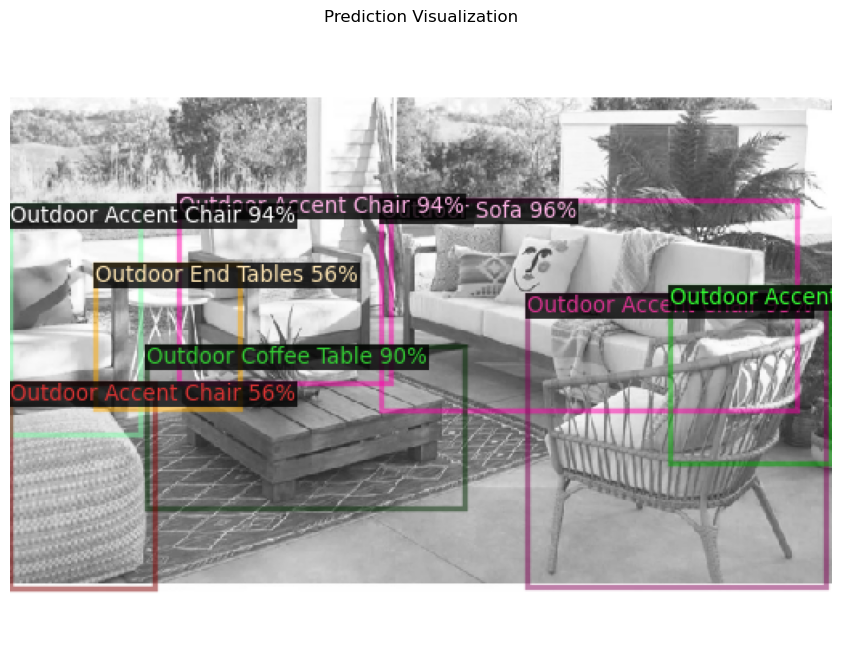

In [96]:
import cv2
import joblib
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from detectron2.utils.visualizer import Visualizer, ColorMode


clf = joblib.load('decision_tree_model.pkl')


results = []


test_image_path = "combined_dataset/test/images/96_jpg.rf.cda08d5466fc30a19143edd9dee25661.jpg"


target_width = 640  
target_height = 480  


img = cv2.imread(test_image_path)

img_resized = cv2.resize(img, (target_width, target_height))  # Resize to the target dimensions
print(f"Image {test_image_path} resized to {img_resized.shape[1]}x{img_resized.shape[0]}")


outputs = predictor(img_resized)  
instances = outputs["instances"]
detected_class_indexes = instances.pred_classes

print(f"Image {test_image_path} has {len(detected_class_indexes)} predictions")


class_name_list = [class_catalog[i] for i in detected_class_indexes.tolist()]


result = apply_quantifiers_and_compute_facet_scores(class_name_list)

if result is not None:
    detected_objects, facet_scores, Aavg = result
    print(f"Detected objects: {detected_objects}")
    print(f"Facet scores: {facet_scores}")
    print(f"Aavg score: {round(Aavg, 3)}")

    
    feature_vector = [
        detected_objects.get('barstools', 0),
        detected_objects.get('bush', 0),
        detected_objects.get('chair', 0),
        detected_objects.get('dog', 0),
        detected_objects.get('fence', 0),
        detected_objects.get('firepit', 0),
        detected_objects.get('furniture', 0),
        detected_objects.get('human', 0),
        detected_objects.get('outdoor_accent_chair', 0),
        detected_objects.get('outdoor_chaise', 0),
        detected_objects.get('outdoor_coffee_table', 0),
        detected_objects.get('outdoor_dining_chairs', 0),
        detected_objects.get('outdoor_dining_table', 0),
        detected_objects.get('outdoor_end_tables', 0),
        detected_objects.get('outdoor_sofa', 0),
        detected_objects.get('plants', 0),
        detected_objects.get('pole', 0),
        detected_objects.get('rock', 0),
        detected_objects.get('sprinkler', 0),
        detected_objects.get('trash', 0),
        detected_objects.get('tree', 0),
        detected_objects.get('umbrella', 0),
        Aavg
    ]

    
    predicted_class = clf.predict([feature_vector])[0]  # Make the prediction here
    print(f"Predicted class: {predicted_class}")

    
    results.append({
        'image': test_image_path,  
        'detected_objects': detected_objects,
        'facet_scores': facet_scores,
        'Aavg': round(Aavg, 3),
        'predicted_class': predicted_class
    })
else:
    print(f"Excluding image {test_image_path} due to exceeding quantifier limits.")
    results.append({
        'image': test_image_path,
        'detected_objects': None,
        'facet_scores': None,
        'Aavg': None,
        'predicted_class': 'Excluded'
    })


print(f"Number of results for the image: {len(results)}")


df_results = pd.DataFrame(results)


df_results.to_csv('single_image_test_prediction.csv', index=False)


print("\nFinal Results:")
print(df_results)


visualizer = Visualizer(
    img_resized[:, :, ::-1],
    metadata=metadata, 
    scale=0.8, 
    instance_mode=ColorMode.IMAGE_BW
)
out = visualizer.draw_instance_predictions(outputs["instances"].to("cpu"))

result_image = out.get_image()[:, :, ::-1]

plt.figure(figsize=(12, 8))
plt.imshow(result_image)
plt.axis("off")
plt.title("Prediction Visualization")
plt.show()


In [101]:
import cv2
import joblib
import pandas as pd
import os
from detectron2.utils.visualizer import Visualizer, ColorMode


clf = joblib.load('decision_tree_model.pkl')

results = []


test_image_dir = "/home/sagemaker-user/combined_dataset/test/images"  # Update this path


image_files = [f for f in os.listdir(test_image_dir) if f.endswith(('.jpg', '.jpeg', '.png', '.gif'))]

# Iterate through the images in the test directory
for idx, image_file in enumerate(image_files):
    # Construct the full path to the image
    image_path = os.path.join(test_image_dir, image_file)
    
    # Load the image
    img = cv2.imread(image_path)
    
    # Run the predictor on the image
    outputs = predictor(img)  # Use your predictor here
    
    instances = outputs["instances"]
    detected_class_indexes = instances.pred_classes
    
    # Print the number of detected objects (predictions) for each image
    print(f"Image {image_file} has {len(detected_class_indexes)} predictions")

    # Continue with your feature extraction and prediction code
    class_name_list = [class_catalog[i] for i in detected_class_indexes.tolist()]
    
    # Apply quantifiers and facet scoring
    result = apply_quantifiers_and_compute_facet_scores(class_name_list)

    if result is not None:
        detected_objects, facet_scores, Aavg = result
        print(f"Detected objects: {detected_objects}")
        print(f"Facet scores: {facet_scores}")
        print(f"Aavg score: {Aavg}")
        
        
        feature_vector = [
            detected_objects.get('barstools', 0),
            detected_objects.get('bush', 0),
            detected_objects.get('chair', 0),
            detected_objects.get('dog', 0),
            detected_objects.get('fence', 0),
            detected_objects.get('firepit', 0),
            detected_objects.get('furniture', 0),
            detected_objects.get('human', 0),
            detected_objects.get('outdoor_accent_chair', 0),
            detected_objects.get('outdoor_chaise', 0),
            detected_objects.get('outdoor_coffee_table', 0),
            detected_objects.get('outdoor_dining_chairs', 0),
            detected_objects.get('outdoor_dining_table', 0),
            detected_objects.get('outdoor_end_tables', 0),
            detected_objects.get('outdoor_sofa', 0),
            detected_objects.get('plants', 0),
            detected_objects.get('pole', 0),
            detected_objects.get('rock', 0),
            detected_objects.get('sprinkler', 0),
            detected_objects.get('trash', 0),
            detected_objects.get('tree', 0),
            detected_objects.get('umbrella', 0),
            Aavg
        ]
        
       
        numeric_prediction = clf.predict([feature_vector])[0]
     
        predicted_class = "Garden" if numeric_prediction == 1 else "Not Garden"
        
        print(f"Predicted class: {predicted_class}")
  
        Aavg_display = round(Aavg, 3) if Aavg is not None else "*****"
        
    
        results.append({
            'image': image_file,  
            'detected_objects': detected_objects,
            'facet_scores': facet_scores,
            'Aavg': Aavg_display,
            'predicted_class': predicted_class
        })
    else:
        print(f"Excluding image {image_file} due to exceeding quantifier limits.")
        results.append({
            'image': image_file,
            'detected_objects': None,
            'facet_scores': None,
            'Aavg': None,
            'predicted_class': 'Excluded'
        })


df_results = pd.DataFrame(results)

df_results['detected_objects'] = df_results['detected_objects'].apply(lambda x: str(x) if x is not None else '')
df_results['facet_scores'] = df_results['facet_scores'].apply(lambda x: str(x) if x is not None else '')

df_results['predicted_class'] = df_results['predicted_class'].apply(lambda x: 'Excluded' if x is None else x)


df_results.to_csv('test_predictions.csv', index=False)


print("\nFinal Results:")
print(df_results)

# Optionally, you can add visualization code here if needed
# For example:
# for idx, row in df_results.iterrows():
#     if row['predicted_class'] != 'Excluded':
#         img = cv2.imread(os.path.join(test_image_dir, row['image']))
#         visualizer = Visualizer(img[:, :, ::-1], metadata=metadata, scale=0.8)
#         out = visualizer.draw_instance_predictions(outputs["instances"].to("cpu"))
#         cv2.imshow("Prediction", out.get_image()[:, :, ::-1])
#         cv2.waitKey(0)
# cv2.destroyAllWindows()


Image 66_jpg.rf.68a00f2f9866ec939fbf1b46f8caac45.jpg has 6 predictions

Detected objects after counting: {'barstools': 0, 'bush': 0, 'chair': 0, 'dog': 0, 'fence': 0, 'firepit': 0, 'furniture': 0, 'human': 0, 'outdoor_accent_chair': 4, 'outdoor_chaise': 0, 'outdoor_coffee_table': 0, 'outdoor_dining_chairs': 0, 'outdoor_dining_table': 0, 'outdoor_end_tables': 0, 'outdoor_sofa': 1, 'plants': 1, 'pole': 0, 'rock': 0, 'sprinkler': 0, 'trash': 0, 'tree': 0, 'umbrella': 0}
Detected objects: {'barstools': 0, 'bush': 0, 'chair': 0, 'dog': 0, 'fence': 0, 'firepit': 0, 'furniture': 0, 'human': 0, 'outdoor_accent_chair': 4, 'outdoor_chaise': 0, 'outdoor_coffee_table': 0, 'outdoor_dining_chairs': 0, 'outdoor_dining_table': 0, 'outdoor_end_tables': 0, 'outdoor_sofa': 1, 'plants': 1, 'pole': 0, 'rock': 0, 'sprinkler': 0, 'trash': 0, 'tree': 0, 'umbrella': 0}
Facet scores: {'barstools': {'plausibility': 0.8, 'typicality': 0.85, 'remarkability': 0.6, 'salience': 0.75}, 'bush': {'plausibility': 0.9, 't

/opt/conda/lib/python3.11/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
/opt/conda/lib/python3.11/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
/opt/conda/lib/python3.11/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


Image 136_jpg.rf.ca7119ce11f94bd7f3a699da240738c5.jpg has 8 predictions

Detected objects after counting: {'barstools': 0, 'bush': 0, 'chair': 0, 'dog': 0, 'fence': 0, 'firepit': 0, 'furniture': 0, 'human': 0, 'outdoor_accent_chair': 6, 'outdoor_chaise': 0, 'outdoor_coffee_table': 1, 'outdoor_dining_chairs': 0, 'outdoor_dining_table': 0, 'outdoor_end_tables': 0, 'outdoor_sofa': 1, 'plants': 0, 'pole': 0, 'rock': 0, 'sprinkler': 0, 'trash': 0, 'tree': 0, 'umbrella': 0}
Excluding image: Too many outdoor_accent_chairs detected (exceeds limit).
Excluding image 136_jpg.rf.ca7119ce11f94bd7f3a699da240738c5.jpg due to exceeding quantifier limits.
Image 95_jpg.rf.3fae4dd9911db71fac8e00664d2a9500.jpg has 6 predictions

Detected objects after counting: {'barstools': 0, 'bush': 0, 'chair': 0, 'dog': 0, 'fence': 0, 'firepit': 0, 'furniture': 0, 'human': 0, 'outdoor_accent_chair': 1, 'outdoor_chaise': 0, 'outdoor_coffee_table': 1, 'outdoor_dining_chairs': 0, 'outdoor_dining_table': 0, 'outdoor_end_t

/opt/conda/lib/python3.11/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
/opt/conda/lib/python3.11/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


Image 111-draaipoort-met-hekwerk-Model-Dreumel_jpg.rf.f512e2574eb3bfa979bc22406db7e076.jpg has 2 predictions

Detected objects after counting: {'barstools': 0, 'bush': 0, 'chair': 0, 'dog': 0, 'fence': 2, 'firepit': 0, 'furniture': 0, 'human': 0, 'outdoor_accent_chair': 0, 'outdoor_chaise': 0, 'outdoor_coffee_table': 0, 'outdoor_dining_chairs': 0, 'outdoor_dining_table': 0, 'outdoor_end_tables': 0, 'outdoor_sofa': 0, 'plants': 0, 'pole': 0, 'rock': 0, 'sprinkler': 0, 'trash': 0, 'tree': 0, 'umbrella': 0}
Excluding image: Too many fences detected (exceeds limit).
Excluding image 111-draaipoort-met-hekwerk-Model-Dreumel_jpg.rf.f512e2574eb3bfa979bc22406db7e076.jpg due to exceeding quantifier limits.
Image 82_jpg.rf.0b652b81491301c1e12c2cf297197f66.jpg has 6 predictions

Detected objects after counting: {'barstools': 0, 'bush': 0, 'chair': 0, 'dog': 0, 'fence': 0, 'firepit': 0, 'furniture': 0, 'human': 0, 'outdoor_accent_chair': 2, 'outdoor_chaise': 0, 'outdoor_coffee_table': 1, 'outdoor_d

/opt/conda/lib/python3.11/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
/opt/conda/lib/python3.11/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
/opt/conda/lib/python3.11/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


Image 6-Hekwerk-nagemaakt-palen-hergebruikt_jpg.rf.74d1c9ac02a3402e1ccecc343d36d8e6.jpg has 1 predictions

Detected objects after counting: {'barstools': 0, 'bush': 0, 'chair': 0, 'dog': 0, 'fence': 1, 'firepit': 0, 'furniture': 0, 'human': 0, 'outdoor_accent_chair': 0, 'outdoor_chaise': 0, 'outdoor_coffee_table': 0, 'outdoor_dining_chairs': 0, 'outdoor_dining_table': 0, 'outdoor_end_tables': 0, 'outdoor_sofa': 0, 'plants': 0, 'pole': 0, 'rock': 0, 'sprinkler': 0, 'trash': 0, 'tree': 0, 'umbrella': 0}
Detected objects: {'barstools': 0, 'bush': 0, 'chair': 0, 'dog': 0, 'fence': 1, 'firepit': 0, 'furniture': 0, 'human': 0, 'outdoor_accent_chair': 0, 'outdoor_chaise': 0, 'outdoor_coffee_table': 0, 'outdoor_dining_chairs': 0, 'outdoor_dining_table': 0, 'outdoor_end_tables': 0, 'outdoor_sofa': 0, 'plants': 0, 'pole': 0, 'rock': 0, 'sprinkler': 0, 'trash': 0, 'tree': 0, 'umbrella': 0}
Facet scores: {'barstools': {'plausibility': 0.8, 'typicality': 0.85, 'remarkability': 0.6, 'salience': 0.75

/opt/conda/lib/python3.11/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
/opt/conda/lib/python3.11/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
/opt/conda/lib/python3.11/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


Image 22_jpg.rf.24e25e0298790bfd8b493c1ecc71d7b7.jpg has 3 predictions

Detected objects after counting: {'barstools': 0, 'bush': 0, 'chair': 0, 'dog': 0, 'fence': 0, 'firepit': 0, 'furniture': 0, 'human': 0, 'outdoor_accent_chair': 0, 'outdoor_chaise': 0, 'outdoor_coffee_table': 1, 'outdoor_dining_chairs': 0, 'outdoor_dining_table': 0, 'outdoor_end_tables': 0, 'outdoor_sofa': 0, 'plants': 2, 'pole': 0, 'rock': 0, 'sprinkler': 0, 'trash': 0, 'tree': 0, 'umbrella': 0}
Detected objects: {'barstools': 0, 'bush': 0, 'chair': 0, 'dog': 0, 'fence': 0, 'firepit': 0, 'furniture': 0, 'human': 0, 'outdoor_accent_chair': 0, 'outdoor_chaise': 0, 'outdoor_coffee_table': 1, 'outdoor_dining_chairs': 0, 'outdoor_dining_table': 0, 'outdoor_end_tables': 0, 'outdoor_sofa': 0, 'plants': 2, 'pole': 0, 'rock': 0, 'sprinkler': 0, 'trash': 0, 'tree': 0, 'umbrella': 0}
Facet scores: {'barstools': {'plausibility': 0.8, 'typicality': 0.85, 'remarkability': 0.6, 'salience': 0.75}, 'bush': {'plausibility': 0.9, 't

/opt/conda/lib/python3.11/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
/opt/conda/lib/python3.11/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
/opt/conda/lib/python3.11/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


Image 31-hekwerk-met-eiken-rabat-delen_jpg.rf.9e03493b9f5c26025a270ded05e80493.jpg has 1 predictions

Detected objects after counting: {'barstools': 0, 'bush': 0, 'chair': 0, 'dog': 0, 'fence': 1, 'firepit': 0, 'furniture': 0, 'human': 0, 'outdoor_accent_chair': 0, 'outdoor_chaise': 0, 'outdoor_coffee_table': 0, 'outdoor_dining_chairs': 0, 'outdoor_dining_table': 0, 'outdoor_end_tables': 0, 'outdoor_sofa': 0, 'plants': 0, 'pole': 0, 'rock': 0, 'sprinkler': 0, 'trash': 0, 'tree': 0, 'umbrella': 0}
Detected objects: {'barstools': 0, 'bush': 0, 'chair': 0, 'dog': 0, 'fence': 1, 'firepit': 0, 'furniture': 0, 'human': 0, 'outdoor_accent_chair': 0, 'outdoor_chaise': 0, 'outdoor_coffee_table': 0, 'outdoor_dining_chairs': 0, 'outdoor_dining_table': 0, 'outdoor_end_tables': 0, 'outdoor_sofa': 0, 'plants': 0, 'pole': 0, 'rock': 0, 'sprinkler': 0, 'trash': 0, 'tree': 0, 'umbrella': 0}
Facet scores: {'barstools': {'plausibility': 0.8, 'typicality': 0.85, 'remarkability': 0.6, 'salience': 0.75}, 'b

/opt/conda/lib/python3.11/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
/opt/conda/lib/python3.11/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
/opt/conda/lib/python3.11/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


Image 171_jpg.rf.f0517cb50a327c92a2d9dad36094f499.jpg has 9 predictions

Detected objects after counting: {'barstools': 0, 'bush': 0, 'chair': 0, 'dog': 0, 'fence': 0, 'firepit': 0, 'furniture': 0, 'human': 0, 'outdoor_accent_chair': 2, 'outdoor_chaise': 0, 'outdoor_coffee_table': 0, 'outdoor_dining_chairs': 4, 'outdoor_dining_table': 0, 'outdoor_end_tables': 0, 'outdoor_sofa': 0, 'plants': 3, 'pole': 0, 'rock': 0, 'sprinkler': 0, 'trash': 0, 'tree': 0, 'umbrella': 0}
Detected objects: {'barstools': 0, 'bush': 0, 'chair': 0, 'dog': 0, 'fence': 0, 'firepit': 0, 'furniture': 0, 'human': 0, 'outdoor_accent_chair': 2, 'outdoor_chaise': 0, 'outdoor_coffee_table': 0, 'outdoor_dining_chairs': 4, 'outdoor_dining_table': 0, 'outdoor_end_tables': 0, 'outdoor_sofa': 0, 'plants': 3, 'pole': 0, 'rock': 0, 'sprinkler': 0, 'trash': 0, 'tree': 0, 'umbrella': 0}
Facet scores: {'barstools': {'plausibility': 0.8, 'typicality': 0.85, 'remarkability': 0.6, 'salience': 0.75}, 'bush': {'plausibility': 0.9, '

/opt/conda/lib/python3.11/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
/opt/conda/lib/python3.11/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


Image 22_jpg.rf.7138c8816d1d73228e8d80d86c72aa1b.jpg has 5 predictions

Detected objects after counting: {'barstools': 0, 'bush': 0, 'chair': 0, 'dog': 0, 'fence': 0, 'firepit': 0, 'furniture': 0, 'human': 0, 'outdoor_accent_chair': 0, 'outdoor_chaise': 0, 'outdoor_coffee_table': 1, 'outdoor_dining_chairs': 0, 'outdoor_dining_table': 0, 'outdoor_end_tables': 0, 'outdoor_sofa': 0, 'plants': 4, 'pole': 0, 'rock': 0, 'sprinkler': 0, 'trash': 0, 'tree': 0, 'umbrella': 0}
Detected objects: {'barstools': 0, 'bush': 0, 'chair': 0, 'dog': 0, 'fence': 0, 'firepit': 0, 'furniture': 0, 'human': 0, 'outdoor_accent_chair': 0, 'outdoor_chaise': 0, 'outdoor_coffee_table': 1, 'outdoor_dining_chairs': 0, 'outdoor_dining_table': 0, 'outdoor_end_tables': 0, 'outdoor_sofa': 0, 'plants': 4, 'pole': 0, 'rock': 0, 'sprinkler': 0, 'trash': 0, 'tree': 0, 'umbrella': 0}
Facet scores: {'barstools': {'plausibility': 0.8, 'typicality': 0.85, 'remarkability': 0.6, 'salience': 0.75}, 'bush': {'plausibility': 0.9, 't

/opt/conda/lib/python3.11/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
/opt/conda/lib/python3.11/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
/opt/conda/lib/python3.11/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


Image 133-1493-hekwerk-lotus-geplaatst-in-wassenaar_jpg.rf.0c71f54daeca7ec583a3b2d6e6fa2c95.jpg has 1 predictions

Detected objects after counting: {'barstools': 0, 'bush': 0, 'chair': 0, 'dog': 0, 'fence': 1, 'firepit': 0, 'furniture': 0, 'human': 0, 'outdoor_accent_chair': 0, 'outdoor_chaise': 0, 'outdoor_coffee_table': 0, 'outdoor_dining_chairs': 0, 'outdoor_dining_table': 0, 'outdoor_end_tables': 0, 'outdoor_sofa': 0, 'plants': 0, 'pole': 0, 'rock': 0, 'sprinkler': 0, 'trash': 0, 'tree': 0, 'umbrella': 0}
Detected objects: {'barstools': 0, 'bush': 0, 'chair': 0, 'dog': 0, 'fence': 1, 'firepit': 0, 'furniture': 0, 'human': 0, 'outdoor_accent_chair': 0, 'outdoor_chaise': 0, 'outdoor_coffee_table': 0, 'outdoor_dining_chairs': 0, 'outdoor_dining_table': 0, 'outdoor_end_tables': 0, 'outdoor_sofa': 0, 'plants': 0, 'pole': 0, 'rock': 0, 'sprinkler': 0, 'trash': 0, 'tree': 0, 'umbrella': 0}
Facet scores: {'barstools': {'plausibility': 0.8, 'typicality': 0.85, 'remarkability': 0.6, 'salienc

/opt/conda/lib/python3.11/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
/opt/conda/lib/python3.11/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
/opt/conda/lib/python3.11/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


Image 131_jpg.rf.850813559c3f23788885355400d92a87.jpg has 10 predictions

Detected objects after counting: {'barstools': 0, 'bush': 0, 'chair': 0, 'dog': 0, 'fence': 0, 'firepit': 0, 'furniture': 0, 'human': 0, 'outdoor_accent_chair': 2, 'outdoor_chaise': 0, 'outdoor_coffee_table': 2, 'outdoor_dining_chairs': 0, 'outdoor_dining_table': 0, 'outdoor_end_tables': 2, 'outdoor_sofa': 1, 'plants': 3, 'pole': 0, 'rock': 0, 'sprinkler': 0, 'trash': 0, 'tree': 0, 'umbrella': 0}
Detected objects: {'barstools': 0, 'bush': 0, 'chair': 0, 'dog': 0, 'fence': 0, 'firepit': 0, 'furniture': 0, 'human': 0, 'outdoor_accent_chair': 2, 'outdoor_chaise': 0, 'outdoor_coffee_table': 2, 'outdoor_dining_chairs': 0, 'outdoor_dining_table': 0, 'outdoor_end_tables': 2, 'outdoor_sofa': 1, 'plants': 3, 'pole': 0, 'rock': 0, 'sprinkler': 0, 'trash': 0, 'tree': 0, 'umbrella': 0}
Facet scores: {'barstools': {'plausibility': 0.8, 'typicality': 0.85, 'remarkability': 0.6, 'salience': 0.75}, 'bush': {'plausibility': 0.9, 

/opt/conda/lib/python3.11/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
/opt/conda/lib/python3.11/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
/opt/conda/lib/python3.11/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


Image 192_jpg.rf.e46dde930a71506386d2754dd0364a26.jpg has 3 predictions

Detected objects after counting: {'barstools': 0, 'bush': 0, 'chair': 0, 'dog': 0, 'fence': 0, 'firepit': 0, 'furniture': 0, 'human': 0, 'outdoor_accent_chair': 3, 'outdoor_chaise': 0, 'outdoor_coffee_table': 0, 'outdoor_dining_chairs': 0, 'outdoor_dining_table': 0, 'outdoor_end_tables': 0, 'outdoor_sofa': 0, 'plants': 0, 'pole': 0, 'rock': 0, 'sprinkler': 0, 'trash': 0, 'tree': 0, 'umbrella': 0}
Detected objects: {'barstools': 0, 'bush': 0, 'chair': 0, 'dog': 0, 'fence': 0, 'firepit': 0, 'furniture': 0, 'human': 0, 'outdoor_accent_chair': 3, 'outdoor_chaise': 0, 'outdoor_coffee_table': 0, 'outdoor_dining_chairs': 0, 'outdoor_dining_table': 0, 'outdoor_end_tables': 0, 'outdoor_sofa': 0, 'plants': 0, 'pole': 0, 'rock': 0, 'sprinkler': 0, 'trash': 0, 'tree': 0, 'umbrella': 0}
Facet scores: {'barstools': {'plausibility': 0.8, 'typicality': 0.85, 'remarkability': 0.6, 'salience': 0.75}, 'bush': {'plausibility': 0.9, '

/opt/conda/lib/python3.11/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
/opt/conda/lib/python3.11/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
/opt/conda/lib/python3.11/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


Image 90-d18f6971466ef6873a72d075b5f07eaf73c15930_jpg.rf.37e391a18db580468ef67d41c849323f.jpg has 1 predictions

Detected objects after counting: {'barstools': 0, 'bush': 0, 'chair': 0, 'dog': 0, 'fence': 1, 'firepit': 0, 'furniture': 0, 'human': 0, 'outdoor_accent_chair': 0, 'outdoor_chaise': 0, 'outdoor_coffee_table': 0, 'outdoor_dining_chairs': 0, 'outdoor_dining_table': 0, 'outdoor_end_tables': 0, 'outdoor_sofa': 0, 'plants': 0, 'pole': 0, 'rock': 0, 'sprinkler': 0, 'trash': 0, 'tree': 0, 'umbrella': 0}
Detected objects: {'barstools': 0, 'bush': 0, 'chair': 0, 'dog': 0, 'fence': 1, 'firepit': 0, 'furniture': 0, 'human': 0, 'outdoor_accent_chair': 0, 'outdoor_chaise': 0, 'outdoor_coffee_table': 0, 'outdoor_dining_chairs': 0, 'outdoor_dining_table': 0, 'outdoor_end_tables': 0, 'outdoor_sofa': 0, 'plants': 0, 'pole': 0, 'rock': 0, 'sprinkler': 0, 'trash': 0, 'tree': 0, 'umbrella': 0}
Facet scores: {'barstools': {'plausibility': 0.8, 'typicality': 0.85, 'remarkability': 0.6, 'salience'

/opt/conda/lib/python3.11/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
/opt/conda/lib/python3.11/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
/opt/conda/lib/python3.11/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


Image 329_jpg.rf.4923a8eff707329ea213428a33c57532.jpg has 10 predictions

Detected objects after counting: {'barstools': 0, 'bush': 0, 'chair': 0, 'dog': 0, 'fence': 0, 'firepit': 0, 'furniture': 0, 'human': 0, 'outdoor_accent_chair': 3, 'outdoor_chaise': 0, 'outdoor_coffee_table': 0, 'outdoor_dining_chairs': 3, 'outdoor_dining_table': 0, 'outdoor_end_tables': 0, 'outdoor_sofa': 1, 'plants': 3, 'pole': 0, 'rock': 0, 'sprinkler': 0, 'trash': 0, 'tree': 0, 'umbrella': 0}
Detected objects: {'barstools': 0, 'bush': 0, 'chair': 0, 'dog': 0, 'fence': 0, 'firepit': 0, 'furniture': 0, 'human': 0, 'outdoor_accent_chair': 3, 'outdoor_chaise': 0, 'outdoor_coffee_table': 0, 'outdoor_dining_chairs': 3, 'outdoor_dining_table': 0, 'outdoor_end_tables': 0, 'outdoor_sofa': 1, 'plants': 3, 'pole': 0, 'rock': 0, 'sprinkler': 0, 'trash': 0, 'tree': 0, 'umbrella': 0}
Facet scores: {'barstools': {'plausibility': 0.8, 'typicality': 0.85, 'remarkability': 0.6, 'salience': 0.75}, 'bush': {'plausibility': 0.9, 

/opt/conda/lib/python3.11/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
/opt/conda/lib/python3.11/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
/opt/conda/lib/python3.11/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


Image 100_jpg.rf.01a5f05538397fba5204b11bee7577fc.jpg has 6 predictions

Detected objects after counting: {'barstools': 0, 'bush': 0, 'chair': 0, 'dog': 0, 'fence': 0, 'firepit': 0, 'furniture': 0, 'human': 0, 'outdoor_accent_chair': 1, 'outdoor_chaise': 0, 'outdoor_coffee_table': 2, 'outdoor_dining_chairs': 0, 'outdoor_dining_table': 0, 'outdoor_end_tables': 0, 'outdoor_sofa': 1, 'plants': 2, 'pole': 0, 'rock': 0, 'sprinkler': 0, 'trash': 0, 'tree': 0, 'umbrella': 0}
Detected objects: {'barstools': 0, 'bush': 0, 'chair': 0, 'dog': 0, 'fence': 0, 'firepit': 0, 'furniture': 0, 'human': 0, 'outdoor_accent_chair': 1, 'outdoor_chaise': 0, 'outdoor_coffee_table': 2, 'outdoor_dining_chairs': 0, 'outdoor_dining_table': 0, 'outdoor_end_tables': 0, 'outdoor_sofa': 1, 'plants': 2, 'pole': 0, 'rock': 0, 'sprinkler': 0, 'trash': 0, 'tree': 0, 'umbrella': 0}
Facet scores: {'barstools': {'plausibility': 0.8, 'typicality': 0.85, 'remarkability': 0.6, 'salience': 0.75}, 'bush': {'plausibility': 0.9, '

/opt/conda/lib/python3.11/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
/opt/conda/lib/python3.11/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


Image 168-Plaatsen-Hekwerk_jpg.rf.f93d5e7ba29f5b68a972088ce1efd145.jpg has 1 predictions

Detected objects after counting: {'barstools': 0, 'bush': 0, 'chair': 0, 'dog': 0, 'fence': 1, 'firepit': 0, 'furniture': 0, 'human': 0, 'outdoor_accent_chair': 0, 'outdoor_chaise': 0, 'outdoor_coffee_table': 0, 'outdoor_dining_chairs': 0, 'outdoor_dining_table': 0, 'outdoor_end_tables': 0, 'outdoor_sofa': 0, 'plants': 0, 'pole': 0, 'rock': 0, 'sprinkler': 0, 'trash': 0, 'tree': 0, 'umbrella': 0}
Detected objects: {'barstools': 0, 'bush': 0, 'chair': 0, 'dog': 0, 'fence': 1, 'firepit': 0, 'furniture': 0, 'human': 0, 'outdoor_accent_chair': 0, 'outdoor_chaise': 0, 'outdoor_coffee_table': 0, 'outdoor_dining_chairs': 0, 'outdoor_dining_table': 0, 'outdoor_end_tables': 0, 'outdoor_sofa': 0, 'plants': 0, 'pole': 0, 'rock': 0, 'sprinkler': 0, 'trash': 0, 'tree': 0, 'umbrella': 0}
Facet scores: {'barstools': {'plausibility': 0.8, 'typicality': 0.85, 'remarkability': 0.6, 'salience': 0.75}, 'bush': {'plau

/opt/conda/lib/python3.11/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
/opt/conda/lib/python3.11/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
/opt/conda/lib/python3.11/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


Image 218_jpg.rf.f6bb16e4d7ebeacf3e2c0aab05b9ac70.jpg has 5 predictions

Detected objects after counting: {'barstools': 0, 'bush': 0, 'chair': 0, 'dog': 0, 'fence': 0, 'firepit': 0, 'furniture': 0, 'human': 0, 'outdoor_accent_chair': 2, 'outdoor_chaise': 0, 'outdoor_coffee_table': 1, 'outdoor_dining_chairs': 0, 'outdoor_dining_table': 0, 'outdoor_end_tables': 0, 'outdoor_sofa': 1, 'plants': 1, 'pole': 0, 'rock': 0, 'sprinkler': 0, 'trash': 0, 'tree': 0, 'umbrella': 0}
Detected objects: {'barstools': 0, 'bush': 0, 'chair': 0, 'dog': 0, 'fence': 0, 'firepit': 0, 'furniture': 0, 'human': 0, 'outdoor_accent_chair': 2, 'outdoor_chaise': 0, 'outdoor_coffee_table': 1, 'outdoor_dining_chairs': 0, 'outdoor_dining_table': 0, 'outdoor_end_tables': 0, 'outdoor_sofa': 1, 'plants': 1, 'pole': 0, 'rock': 0, 'sprinkler': 0, 'trash': 0, 'tree': 0, 'umbrella': 0}
Facet scores: {'barstools': {'plausibility': 0.8, 'typicality': 0.85, 'remarkability': 0.6, 'salience': 0.75}, 'bush': {'plausibility': 0.9, '

/opt/conda/lib/python3.11/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
/opt/conda/lib/python3.11/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
/opt/conda/lib/python3.11/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
/opt/conda/lib/python3.11/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


Image tree50_jpeg.rf.f5f80b73e7a0a4a55b4b644eae73ae12.jpg has 1 predictions

Detected objects after counting: {'barstools': 0, 'bush': 0, 'chair': 0, 'dog': 0, 'fence': 0, 'firepit': 0, 'furniture': 0, 'human': 0, 'outdoor_accent_chair': 0, 'outdoor_chaise': 0, 'outdoor_coffee_table': 0, 'outdoor_dining_chairs': 0, 'outdoor_dining_table': 0, 'outdoor_end_tables': 0, 'outdoor_sofa': 0, 'plants': 0, 'pole': 0, 'rock': 0, 'sprinkler': 0, 'trash': 0, 'tree': 1, 'umbrella': 0}
Detected objects: {'barstools': 0, 'bush': 0, 'chair': 0, 'dog': 0, 'fence': 0, 'firepit': 0, 'furniture': 0, 'human': 0, 'outdoor_accent_chair': 0, 'outdoor_chaise': 0, 'outdoor_coffee_table': 0, 'outdoor_dining_chairs': 0, 'outdoor_dining_table': 0, 'outdoor_end_tables': 0, 'outdoor_sofa': 0, 'plants': 0, 'pole': 0, 'rock': 0, 'sprinkler': 0, 'trash': 0, 'tree': 1, 'umbrella': 0}
Facet scores: {'barstools': {'plausibility': 0.8, 'typicality': 0.85, 'remarkability': 0.6, 'salience': 0.75}, 'bush': {'plausibility': 0.

/opt/conda/lib/python3.11/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
/opt/conda/lib/python3.11/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
/opt/conda/lib/python3.11/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


Image 198_jpg.rf.5959581d9f29f16ba76c1f8b21264d18.jpg has 4 predictions

Detected objects after counting: {'barstools': 0, 'bush': 0, 'chair': 0, 'dog': 0, 'fence': 0, 'firepit': 0, 'furniture': 0, 'human': 0, 'outdoor_accent_chair': 2, 'outdoor_chaise': 0, 'outdoor_coffee_table': 0, 'outdoor_dining_chairs': 2, 'outdoor_dining_table': 0, 'outdoor_end_tables': 0, 'outdoor_sofa': 0, 'plants': 0, 'pole': 0, 'rock': 0, 'sprinkler': 0, 'trash': 0, 'tree': 0, 'umbrella': 0}
Detected objects: {'barstools': 0, 'bush': 0, 'chair': 0, 'dog': 0, 'fence': 0, 'firepit': 0, 'furniture': 0, 'human': 0, 'outdoor_accent_chair': 2, 'outdoor_chaise': 0, 'outdoor_coffee_table': 0, 'outdoor_dining_chairs': 2, 'outdoor_dining_table': 0, 'outdoor_end_tables': 0, 'outdoor_sofa': 0, 'plants': 0, 'pole': 0, 'rock': 0, 'sprinkler': 0, 'trash': 0, 'tree': 0, 'umbrella': 0}
Facet scores: {'barstools': {'plausibility': 0.8, 'typicality': 0.85, 'remarkability': 0.6, 'salience': 0.75}, 'bush': {'plausibility': 0.9, '

/opt/conda/lib/python3.11/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
/opt/conda/lib/python3.11/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
/opt/conda/lib/python3.11/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


Image 45_jpg.rf.fea84a6d679097aee6152445369b8815.jpg has 8 predictions

Detected objects after counting: {'barstools': 0, 'bush': 0, 'chair': 0, 'dog': 0, 'fence': 0, 'firepit': 0, 'furniture': 0, 'human': 0, 'outdoor_accent_chair': 4, 'outdoor_chaise': 0, 'outdoor_coffee_table': 1, 'outdoor_dining_chairs': 0, 'outdoor_dining_table': 0, 'outdoor_end_tables': 1, 'outdoor_sofa': 1, 'plants': 1, 'pole': 0, 'rock': 0, 'sprinkler': 0, 'trash': 0, 'tree': 0, 'umbrella': 0}
Detected objects: {'barstools': 0, 'bush': 0, 'chair': 0, 'dog': 0, 'fence': 0, 'firepit': 0, 'furniture': 0, 'human': 0, 'outdoor_accent_chair': 4, 'outdoor_chaise': 0, 'outdoor_coffee_table': 1, 'outdoor_dining_chairs': 0, 'outdoor_dining_table': 0, 'outdoor_end_tables': 1, 'outdoor_sofa': 1, 'plants': 1, 'pole': 0, 'rock': 0, 'sprinkler': 0, 'trash': 0, 'tree': 0, 'umbrella': 0}
Facet scores: {'barstools': {'plausibility': 0.8, 'typicality': 0.85, 'remarkability': 0.6, 'salience': 0.75}, 'bush': {'plausibility': 0.9, 't

/opt/conda/lib/python3.11/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
/opt/conda/lib/python3.11/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
/opt/conda/lib/python3.11/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


Image 237_jpg.rf.07af3b3302454e2e2093c23b74a769ae.jpg has 11 predictions

Detected objects after counting: {'barstools': 0, 'bush': 0, 'chair': 0, 'dog': 0, 'fence': 0, 'firepit': 0, 'furniture': 0, 'human': 0, 'outdoor_accent_chair': 4, 'outdoor_chaise': 0, 'outdoor_coffee_table': 2, 'outdoor_dining_chairs': 0, 'outdoor_dining_table': 0, 'outdoor_end_tables': 0, 'outdoor_sofa': 2, 'plants': 3, 'pole': 0, 'rock': 0, 'sprinkler': 0, 'trash': 0, 'tree': 0, 'umbrella': 0}
Detected objects: {'barstools': 0, 'bush': 0, 'chair': 0, 'dog': 0, 'fence': 0, 'firepit': 0, 'furniture': 0, 'human': 0, 'outdoor_accent_chair': 4, 'outdoor_chaise': 0, 'outdoor_coffee_table': 2, 'outdoor_dining_chairs': 0, 'outdoor_dining_table': 0, 'outdoor_end_tables': 0, 'outdoor_sofa': 2, 'plants': 3, 'pole': 0, 'rock': 0, 'sprinkler': 0, 'trash': 0, 'tree': 0, 'umbrella': 0}
Facet scores: {'barstools': {'plausibility': 0.8, 'typicality': 0.85, 'remarkability': 0.6, 'salience': 0.75}, 'bush': {'plausibility': 0.9, 

/opt/conda/lib/python3.11/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
/opt/conda/lib/python3.11/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
/opt/conda/lib/python3.11/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


Image 23_jpg.rf.d4de230310dd76f84e70b529ed36b450.jpg has 11 predictions

Detected objects after counting: {'barstools': 0, 'bush': 0, 'chair': 0, 'dog': 0, 'fence': 0, 'firepit': 0, 'furniture': 0, 'human': 0, 'outdoor_accent_chair': 0, 'outdoor_chaise': 0, 'outdoor_coffee_table': 0, 'outdoor_dining_chairs': 10, 'outdoor_dining_table': 0, 'outdoor_end_tables': 0, 'outdoor_sofa': 0, 'plants': 1, 'pole': 0, 'rock': 0, 'sprinkler': 0, 'trash': 0, 'tree': 0, 'umbrella': 0}
Excluding image: Too many outdoor_dining_chairss detected (exceeds limit).
Excluding image 23_jpg.rf.d4de230310dd76f84e70b529ed36b450.jpg due to exceeding quantifier limits.
Image 198_jpg.rf.224728b731f46937115fdd0cce705ab5.jpg has 3 predictions

Detected objects after counting: {'barstools': 0, 'bush': 0, 'chair': 0, 'dog': 0, 'fence': 0, 'firepit': 0, 'furniture': 0, 'human': 0, 'outdoor_accent_chair': 2, 'outdoor_chaise': 0, 'outdoor_coffee_table': 0, 'outdoor_dining_chairs': 1, 'outdoor_dining_table': 0, 'outdoor_end

/opt/conda/lib/python3.11/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


Image WhatsApp-Image-2021-11-17-at-15-22-06_jpeg.rf.3c9f620ea5e37eff45bd2319c325f9b6.jpg has 2 predictions

Detected objects after counting: {'barstools': 0, 'bush': 0, 'chair': 0, 'dog': 0, 'fence': 2, 'firepit': 0, 'furniture': 0, 'human': 0, 'outdoor_accent_chair': 0, 'outdoor_chaise': 0, 'outdoor_coffee_table': 0, 'outdoor_dining_chairs': 0, 'outdoor_dining_table': 0, 'outdoor_end_tables': 0, 'outdoor_sofa': 0, 'plants': 0, 'pole': 0, 'rock': 0, 'sprinkler': 0, 'trash': 0, 'tree': 0, 'umbrella': 0}
Excluding image: Too many fences detected (exceeds limit).
Excluding image WhatsApp-Image-2021-11-17-at-15-22-06_jpeg.rf.3c9f620ea5e37eff45bd2319c325f9b6.jpg due to exceeding quantifier limits.
Image 341_jpg.rf.787c724e23285f9c8656532ab93da9a0.jpg has 6 predictions

Detected objects after counting: {'barstools': 0, 'bush': 0, 'chair': 0, 'dog': 0, 'fence': 0, 'firepit': 0, 'furniture': 0, 'human': 0, 'outdoor_accent_chair': 4, 'outdoor_chaise': 0, 'outdoor_coffee_table': 1, 'outdoor_dini

/opt/conda/lib/python3.11/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
/opt/conda/lib/python3.11/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
/opt/conda/lib/python3.11/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
/opt/conda/lib/python3.11/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


Image sprinkler-1_jpg.rf.711d141a0866637564f4a19fd98e3b2f.jpg has 0 predictions

Detected objects after counting: {'barstools': 0, 'bush': 0, 'chair': 0, 'dog': 0, 'fence': 0, 'firepit': 0, 'furniture': 0, 'human': 0, 'outdoor_accent_chair': 0, 'outdoor_chaise': 0, 'outdoor_coffee_table': 0, 'outdoor_dining_chairs': 0, 'outdoor_dining_table': 0, 'outdoor_end_tables': 0, 'outdoor_sofa': 0, 'plants': 0, 'pole': 0, 'rock': 0, 'sprinkler': 0, 'trash': 0, 'tree': 0, 'umbrella': 0}
Detected objects: {'barstools': 0, 'bush': 0, 'chair': 0, 'dog': 0, 'fence': 0, 'firepit': 0, 'furniture': 0, 'human': 0, 'outdoor_accent_chair': 0, 'outdoor_chaise': 0, 'outdoor_coffee_table': 0, 'outdoor_dining_chairs': 0, 'outdoor_dining_table': 0, 'outdoor_end_tables': 0, 'outdoor_sofa': 0, 'plants': 0, 'pole': 0, 'rock': 0, 'sprinkler': 0, 'trash': 0, 'tree': 0, 'umbrella': 0}
Facet scores: {'barstools': {'plausibility': 0.8, 'typicality': 0.85, 'remarkability': 0.6, 'salience': 0.75}, 'bush': {'plausibility'

/opt/conda/lib/python3.11/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
/opt/conda/lib/python3.11/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


Image 117_jpg.rf.18d8baadc818975c756b41d397a9bee8.jpg has 11 predictions

Detected objects after counting: {'barstools': 0, 'bush': 0, 'chair': 0, 'dog': 0, 'fence': 0, 'firepit': 0, 'furniture': 0, 'human': 0, 'outdoor_accent_chair': 5, 'outdoor_chaise': 0, 'outdoor_coffee_table': 0, 'outdoor_dining_chairs': 0, 'outdoor_dining_table': 0, 'outdoor_end_tables': 0, 'outdoor_sofa': 6, 'plants': 0, 'pole': 0, 'rock': 0, 'sprinkler': 0, 'trash': 0, 'tree': 0, 'umbrella': 0}
Excluding image: Too many outdoor_sofas detected (exceeds limit).
Excluding image 117_jpg.rf.18d8baadc818975c756b41d397a9bee8.jpg due to exceeding quantifier limits.
Image 145_jpg.rf.bfe1771ed2bb94eb91aa09a72b0fa7ea.jpg has 11 predictions

Detected objects after counting: {'barstools': 0, 'bush': 0, 'chair': 0, 'dog': 0, 'fence': 0, 'firepit': 0, 'furniture': 0, 'human': 0, 'outdoor_accent_chair': 6, 'outdoor_chaise': 0, 'outdoor_coffee_table': 2, 'outdoor_dining_chairs': 0, 'outdoor_dining_table': 0, 'outdoor_end_tables

/opt/conda/lib/python3.11/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
/opt/conda/lib/python3.11/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
/opt/conda/lib/python3.11/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


Image 163_jpg.rf.dbfc63248a74521eb574721f0eba03ae.jpg has 4 predictions

Detected objects after counting: {'barstools': 0, 'bush': 0, 'chair': 0, 'dog': 0, 'fence': 0, 'firepit': 0, 'furniture': 0, 'human': 0, 'outdoor_accent_chair': 0, 'outdoor_chaise': 0, 'outdoor_coffee_table': 1, 'outdoor_dining_chairs': 0, 'outdoor_dining_table': 0, 'outdoor_end_tables': 0, 'outdoor_sofa': 1, 'plants': 2, 'pole': 0, 'rock': 0, 'sprinkler': 0, 'trash': 0, 'tree': 0, 'umbrella': 0}
Detected objects: {'barstools': 0, 'bush': 0, 'chair': 0, 'dog': 0, 'fence': 0, 'firepit': 0, 'furniture': 0, 'human': 0, 'outdoor_accent_chair': 0, 'outdoor_chaise': 0, 'outdoor_coffee_table': 1, 'outdoor_dining_chairs': 0, 'outdoor_dining_table': 0, 'outdoor_end_tables': 0, 'outdoor_sofa': 1, 'plants': 2, 'pole': 0, 'rock': 0, 'sprinkler': 0, 'trash': 0, 'tree': 0, 'umbrella': 0}
Facet scores: {'barstools': {'plausibility': 0.8, 'typicality': 0.85, 'remarkability': 0.6, 'salience': 0.75}, 'bush': {'plausibility': 0.9, '

/opt/conda/lib/python3.11/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
/opt/conda/lib/python3.11/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
/opt/conda/lib/python3.11/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


Image 229_jpg.rf.aa0a8521e379cafea640bb229b59a8e6.jpg has 8 predictions

Detected objects after counting: {'barstools': 0, 'bush': 0, 'chair': 0, 'dog': 0, 'fence': 0, 'firepit': 0, 'furniture': 0, 'human': 0, 'outdoor_accent_chair': 4, 'outdoor_chaise': 0, 'outdoor_coffee_table': 0, 'outdoor_dining_chairs': 0, 'outdoor_dining_table': 0, 'outdoor_end_tables': 2, 'outdoor_sofa': 1, 'plants': 1, 'pole': 0, 'rock': 0, 'sprinkler': 0, 'trash': 0, 'tree': 0, 'umbrella': 0}
Detected objects: {'barstools': 0, 'bush': 0, 'chair': 0, 'dog': 0, 'fence': 0, 'firepit': 0, 'furniture': 0, 'human': 0, 'outdoor_accent_chair': 4, 'outdoor_chaise': 0, 'outdoor_coffee_table': 0, 'outdoor_dining_chairs': 0, 'outdoor_dining_table': 0, 'outdoor_end_tables': 2, 'outdoor_sofa': 1, 'plants': 1, 'pole': 0, 'rock': 0, 'sprinkler': 0, 'trash': 0, 'tree': 0, 'umbrella': 0}
Facet scores: {'barstools': {'plausibility': 0.8, 'typicality': 0.85, 'remarkability': 0.6, 'salience': 0.75}, 'bush': {'plausibility': 0.9, '

/opt/conda/lib/python3.11/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
/opt/conda/lib/python3.11/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
/opt/conda/lib/python3.11/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


Image 36_jpg.rf.e7365045257392e9b3f5c48d3395d4db.jpg has 8 predictions

Detected objects after counting: {'barstools': 0, 'bush': 0, 'chair': 0, 'dog': 0, 'fence': 0, 'firepit': 0, 'furniture': 0, 'human': 0, 'outdoor_accent_chair': 1, 'outdoor_chaise': 0, 'outdoor_coffee_table': 1, 'outdoor_dining_chairs': 0, 'outdoor_dining_table': 0, 'outdoor_end_tables': 1, 'outdoor_sofa': 2, 'plants': 3, 'pole': 0, 'rock': 0, 'sprinkler': 0, 'trash': 0, 'tree': 0, 'umbrella': 0}
Detected objects: {'barstools': 0, 'bush': 0, 'chair': 0, 'dog': 0, 'fence': 0, 'firepit': 0, 'furniture': 0, 'human': 0, 'outdoor_accent_chair': 1, 'outdoor_chaise': 0, 'outdoor_coffee_table': 1, 'outdoor_dining_chairs': 0, 'outdoor_dining_table': 0, 'outdoor_end_tables': 1, 'outdoor_sofa': 2, 'plants': 3, 'pole': 0, 'rock': 0, 'sprinkler': 0, 'trash': 0, 'tree': 0, 'umbrella': 0}
Facet scores: {'barstools': {'plausibility': 0.8, 'typicality': 0.85, 'remarkability': 0.6, 'salience': 0.75}, 'bush': {'plausibility': 0.9, 't

/opt/conda/lib/python3.11/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
/opt/conda/lib/python3.11/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
/opt/conda/lib/python3.11/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


Image 51_jpg.rf.d55e7f2f7993dde8c40837ad413f8fcb.jpg has 9 predictions

Detected objects after counting: {'barstools': 0, 'bush': 0, 'chair': 0, 'dog': 0, 'fence': 1, 'firepit': 0, 'furniture': 0, 'human': 0, 'outdoor_accent_chair': 2, 'outdoor_chaise': 0, 'outdoor_coffee_table': 1, 'outdoor_dining_chairs': 5, 'outdoor_dining_table': 0, 'outdoor_end_tables': 0, 'outdoor_sofa': 0, 'plants': 0, 'pole': 0, 'rock': 0, 'sprinkler': 0, 'trash': 0, 'tree': 0, 'umbrella': 0}
Detected objects: {'barstools': 0, 'bush': 0, 'chair': 0, 'dog': 0, 'fence': 1, 'firepit': 0, 'furniture': 0, 'human': 0, 'outdoor_accent_chair': 2, 'outdoor_chaise': 0, 'outdoor_coffee_table': 1, 'outdoor_dining_chairs': 5, 'outdoor_dining_table': 0, 'outdoor_end_tables': 0, 'outdoor_sofa': 0, 'plants': 0, 'pole': 0, 'rock': 0, 'sprinkler': 0, 'trash': 0, 'tree': 0, 'umbrella': 0}
Facet scores: {'barstools': {'plausibility': 0.8, 'typicality': 0.85, 'remarkability': 0.6, 'salience': 0.75}, 'bush': {'plausibility': 0.9, 't

/opt/conda/lib/python3.11/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
/opt/conda/lib/python3.11/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
/opt/conda/lib/python3.11/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


Image tree6_jpeg.rf.bc32555b15d85962f222107a9dda6015.jpg has 1 predictions

Detected objects after counting: {'barstools': 0, 'bush': 0, 'chair': 0, 'dog': 0, 'fence': 0, 'firepit': 0, 'furniture': 0, 'human': 0, 'outdoor_accent_chair': 0, 'outdoor_chaise': 0, 'outdoor_coffee_table': 0, 'outdoor_dining_chairs': 0, 'outdoor_dining_table': 0, 'outdoor_end_tables': 0, 'outdoor_sofa': 0, 'plants': 0, 'pole': 0, 'rock': 0, 'sprinkler': 0, 'trash': 0, 'tree': 1, 'umbrella': 0}
Detected objects: {'barstools': 0, 'bush': 0, 'chair': 0, 'dog': 0, 'fence': 0, 'firepit': 0, 'furniture': 0, 'human': 0, 'outdoor_accent_chair': 0, 'outdoor_chaise': 0, 'outdoor_coffee_table': 0, 'outdoor_dining_chairs': 0, 'outdoor_dining_table': 0, 'outdoor_end_tables': 0, 'outdoor_sofa': 0, 'plants': 0, 'pole': 0, 'rock': 0, 'sprinkler': 0, 'trash': 0, 'tree': 1, 'umbrella': 0}
Facet scores: {'barstools': {'plausibility': 0.8, 'typicality': 0.85, 'remarkability': 0.6, 'salience': 0.75}, 'bush': {'plausibility': 0.9

/opt/conda/lib/python3.11/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
/opt/conda/lib/python3.11/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


**CLIP model on test images folder**

In [102]:
!pip install git+https://github.com/openai/CLIP.git
!pip install torch torchvision


  Cloning https://github.com/openai/CLIP.git to /tmp/pip-req-build-f3loq186
  Running command git clone --filter=blob:none --quiet https://github.com/openai/CLIP.git /tmp/pip-req-build-f3loq186
  Resolved https://github.com/openai/CLIP.git to commit dcba3cb2e2827b402d2701e7e1c7d9fed8a20ef1
  Preparing metadata (setup.py) ... done
  Using cached ftfy-6.3.1-py3-none-any.whl.metadata (7.3 kB)
Using cached ftfy-6.3.1-py3-none-any.whl (44 kB)
  Created wheel for clip: filename=clip-1.0-py3-none-any.whl size=1369489 sha256=f2c12fa6eafbbb548e224281db31bd51aabb12c4d79dce1e0aa6e2e97f5bb9ad
  Stored in directory: /tmp/pip-ephem-wheel-cache-djdwl1n7/wheels/3f/7c/a4/9b490845988bf7a4db33674d52f709f088f64392063872eb9a
Successfully built clip


Similarity scores for 66_jpg.rf.68a00f2f9866ec939fbf1b46f8caac45.jpg:
  Garden/Patio/Backyard: 28.58
  Not Garden/Patio/Backyard: 25.66
Similarity scores for bush-2_jpg.rf.820857638dd65c9c2db998e75a817703.jpg:
  Garden/Patio/Backyard: 26.20
  Not Garden/Patio/Backyard: 24.48
Similarity scores for 110_jpg.rf.21e79d2ff13bf598cba00aeafc947ced.jpg:
  Garden/Patio/Backyard: 26.28
  Not Garden/Patio/Backyard: 23.91
Similarity scores for 136_jpg.rf.ca7119ce11f94bd7f3a699da240738c5.jpg:
  Garden/Patio/Backyard: 25.25
  Not Garden/Patio/Backyard: 24.03
Similarity scores for 95_jpg.rf.3fae4dd9911db71fac8e00664d2a9500.jpg:
  Garden/Patio/Backyard: 27.17
  Not Garden/Patio/Backyard: 25.53
Similarity scores for 111-draaipoort-met-hekwerk-Model-Dreumel_jpg.rf.f512e2574eb3bfa979bc22406db7e076.jpg:
  Garden/Patio/Backyard: 23.45
  Not Garden/Patio/Backyard: 24.16
Similarity scores for 82_jpg.rf.0b652b81491301c1e12c2cf297197f66.jpg:
  Garden/Patio/Backyard: 27.84
  Not Garden/Patio/Backyard: 25.16
Simi

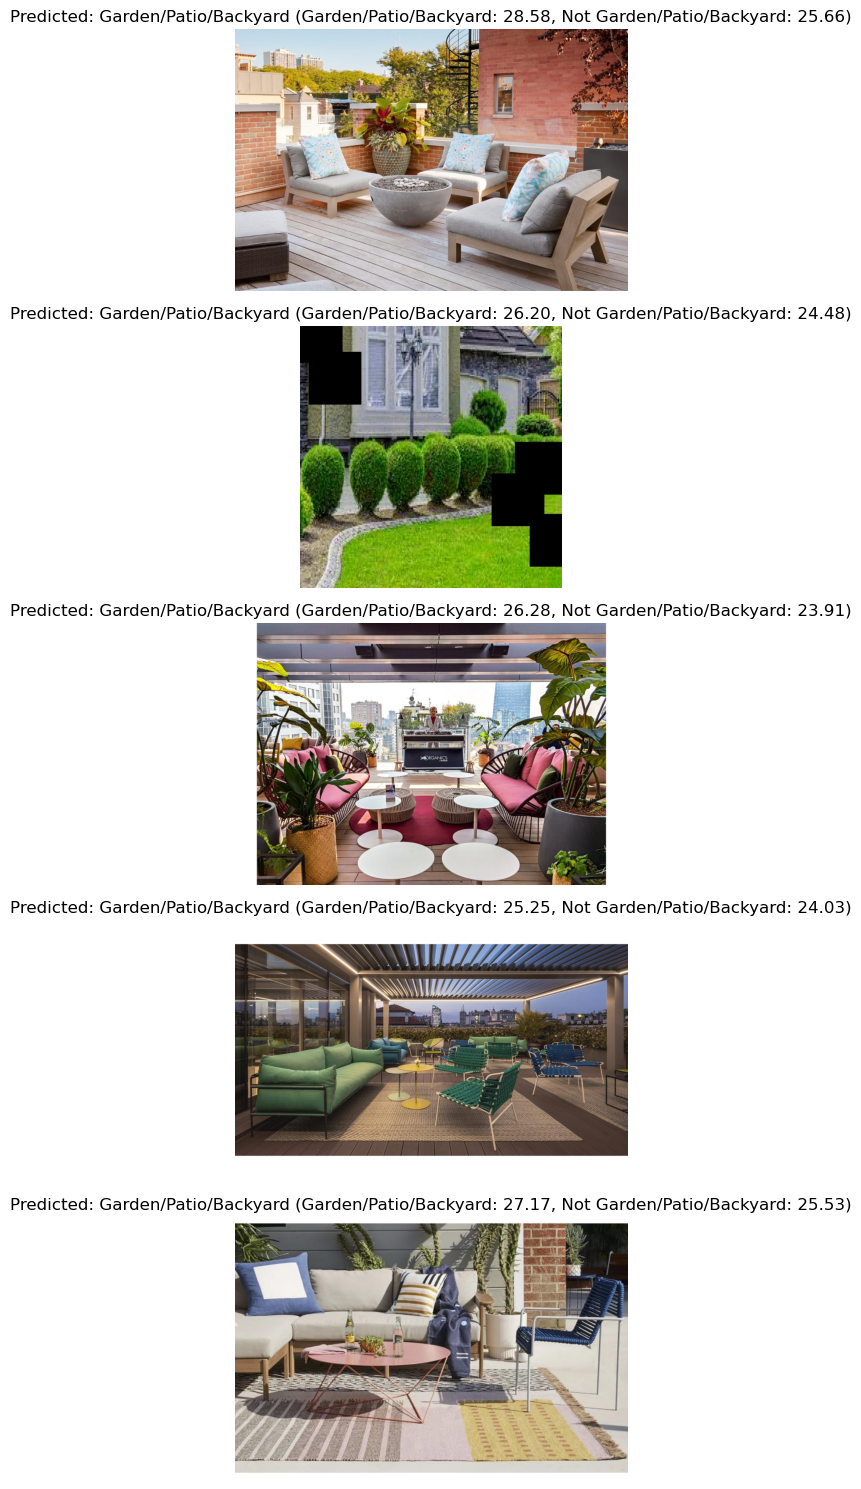

In [104]:
import torch
import clip
from PIL import Image
import pandas as pd
import os
import matplotlib.pyplot as plt

# Load the CLIP model
device = "cuda" if torch.cuda.is_available() else "cpu"
model, preprocess = clip.load("ViT-B/32", device)

class_names = [
    "A photo of a well-maintained outdoor space like a garden, patio, or backyard with plants, furniture, and landscaping features",
    "A photo of a general outdoor scene without intentional landscaping or garden features"
]

class_mapping = {
    class_names[0]: "Garden/Patio/Backyard",
    class_names[1]: "Not Garden/Patio/Backyard"
}

clip_results = []


test_folder = "/home/sagemaker-user/combined_dataset/test/images"  

for filename in os.listdir(test_folder):
    if filename.endswith(('.jpg', '.jpeg', '.png', '.gif')):  
        img_path = os.path.join(test_folder, filename)
        
        
        image = preprocess(Image.open(img_path)).unsqueeze(0).to(device)

        
        with torch.no_grad():
            image_features = model.encode_image(image)
            text_inputs = torch.cat([clip.tokenize(f"{class_name}") for class_name in class_names]).to(device)
            text_features = model.encode_text(text_inputs)

        
        image_features /= image_features.norm(dim=-1, keepdim=True)
        text_features /= text_features.norm(dim=-1, keepdim=True)

      
        similarity = (100.0 * image_features @ text_features.T).squeeze(0)
        
        
        print(f"Similarity scores for {filename}:")
        for i, score in enumerate(similarity):
            print(f"  {class_mapping[class_names[i]]}: {score.item():.2f}")

       
        predicted_class_index = similarity.argmax().item()
        descriptive_class = class_names[predicted_class_index]
        simplified_class = class_mapping[descriptive_class]

        
        confidence = torch.softmax(similarity, dim=0)[predicted_class_index].item()
        if confidence < 0.55:  
            simplified_class = "Uncertain"
        
       
        clip_results.append({
            'image': filename,
            'clip_predicted_class': simplified_class,
            'garden_patio_backyard_score': similarity[0].item(),
            'not_garden_patio_backyard_score': similarity[1].item(),
            'confidence': confidence
        })


df_clip_results = pd.DataFrame(clip_results)


print("\nCLIP Model Results:")
print(df_clip_results)


df_clip_results.to_csv("clip_outdoor_space_predictions.csv", index=False)


num_images_to_show = 5  # Change this to show more or fewer images
plt.figure(figsize=(15, 3*num_images_to_show))

for i in range(min(num_images_to_show, len(clip_results))):
    img_path = os.path.join(test_folder, clip_results[i]['image'])
    img = Image.open(img_path)
    plt.subplot(num_images_to_show, 1, i+1)
    plt.imshow(img)
    plt.title(f"Predicted: {clip_results[i]['clip_predicted_class']} " +
              f"(Garden/Patio/Backyard: {clip_results[i]['garden_patio_backyard_score']:.2f}, " +
              f"Not Garden/Patio/Backyard: {clip_results[i]['not_garden_patio_backyard_score']:.2f})")
    plt.axis('off')

plt.tight_layout()
plt.show()


**Compare CLIP Predictions with Decision Tree Predictions**
Now that we have the predictions from both the CLIP model and our Decision Tree, we can compare them. Assuming that the Decision Tree predictions are already saved in test_predictions.csv, we can merge the two results into one DataFrame for comparison.

In [105]:
# Load the Decision Tree predictions CSV
df_dt_results = pd.read_csv('test_predictions.csv')

# Merge the two DataFrames based on the image path
df_comparison = pd.merge(df_dt_results, df_clip_results, on='image')

# Display the comparison results
print("\nComparison between Decision Tree and CLIP Predictions:")
print(df_comparison)

# Save the comparison results to a CSV file
df_comparison.to_csv('comparison_predictions.csv', index=False)



Comparison between Decision Tree and CLIP Predictions:
                                                image  \
0      66_jpg.rf.68a00f2f9866ec939fbf1b46f8caac45.jpg   
1   bush-2_jpg.rf.820857638dd65c9c2db998e75a817703...   
2     110_jpg.rf.21e79d2ff13bf598cba00aeafc947ced.jpg   
3     136_jpg.rf.ca7119ce11f94bd7f3a699da240738c5.jpg   
4      95_jpg.rf.3fae4dd9911db71fac8e00664d2a9500.jpg   
..                                                ...   
95     60_jpg.rf.f4f9d4788cc50402d1b4ad0a33f386a6.jpg   
96  tree72_jpeg.rf.0969a7bdf43bd292e8577a37648ffe2...   
97    184_jpg.rf.4d4c62715d08e600132ef41c12a62671.jpg   
98  tree-4_jpg.rf.a66a52c0b0f6ce248f04decbabed0a83...   
99     25_jpg.rf.be769a46374290a94769c5912710f4fe.jpg   

                                     detected_objects  \
0   {'barstools': 0, 'bush': 0, 'chair': 0, 'dog':...   
1   {'barstools': 0, 'bush': 0, 'chair': 0, 'dog':...   
2   {'barstools': 0, 'bush': 0, 'chair': 0, 'dog':...   
3                              

**Metrics to compare performance**

In [107]:
##LOAD and MERGE
import pandas as pd

# Load the CSVs
df_dt_results = pd.read_csv('test_predictions.csv')  # Decision Tree predictions
df_clip_results = pd.read_csv('clip_predictions.csv')  # CLIP predictions

# Merge the two DataFrames based on the `image` column
df_comparison = pd.merge(df_dt_results[['image', 'predicted_class']], 
                         df_clip_results[['image', 'clip_predicted_class']], 
                         on='image', 
                         how='inner')



**Visualize the Comparison**

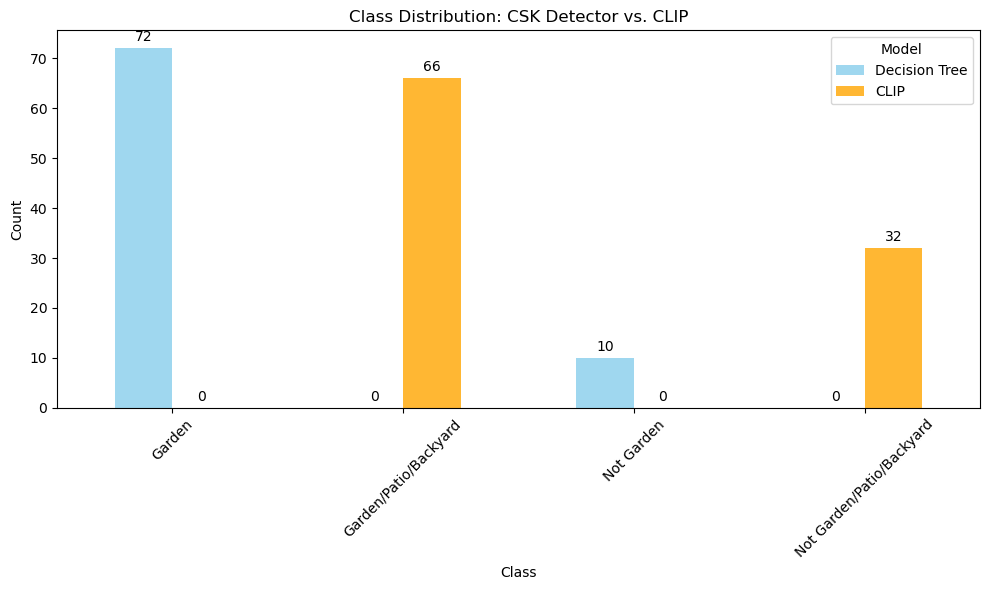

In [118]:
import matplotlib.pyplot as plt
import pandas as pd

# Prepare data for plotting, excluding 'Excluded' class
class_distribution = pd.DataFrame({
    'Decision Tree': df_comparison['predicted_class'].value_counts().drop('Excluded', errors='ignore'),
    'CLIP': df_comparison['clip_predicted_class'].value_counts().drop('Uncertain', errors='ignore')
})

# Plot a grouped bar chart
ax = class_distribution.plot(kind='bar', figsize=(10, 6), color=['skyblue', 'orange'], alpha=0.8)

# Customize the plot
plt.title("Class Distribution: CSK Detector vs. CLIP")
plt.xlabel("Class")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.legend(title="Model")

# Add value labels on top of each bar
for container in ax.containers:
    ax.bar_label(container, padding=3)

plt.tight_layout()

# Save the plot as an image
plt.savefig("class_distribution_comparison_bar_chart.png", dpi=300)

plt.show()


**Side-by-Side Comparison of Predictions**

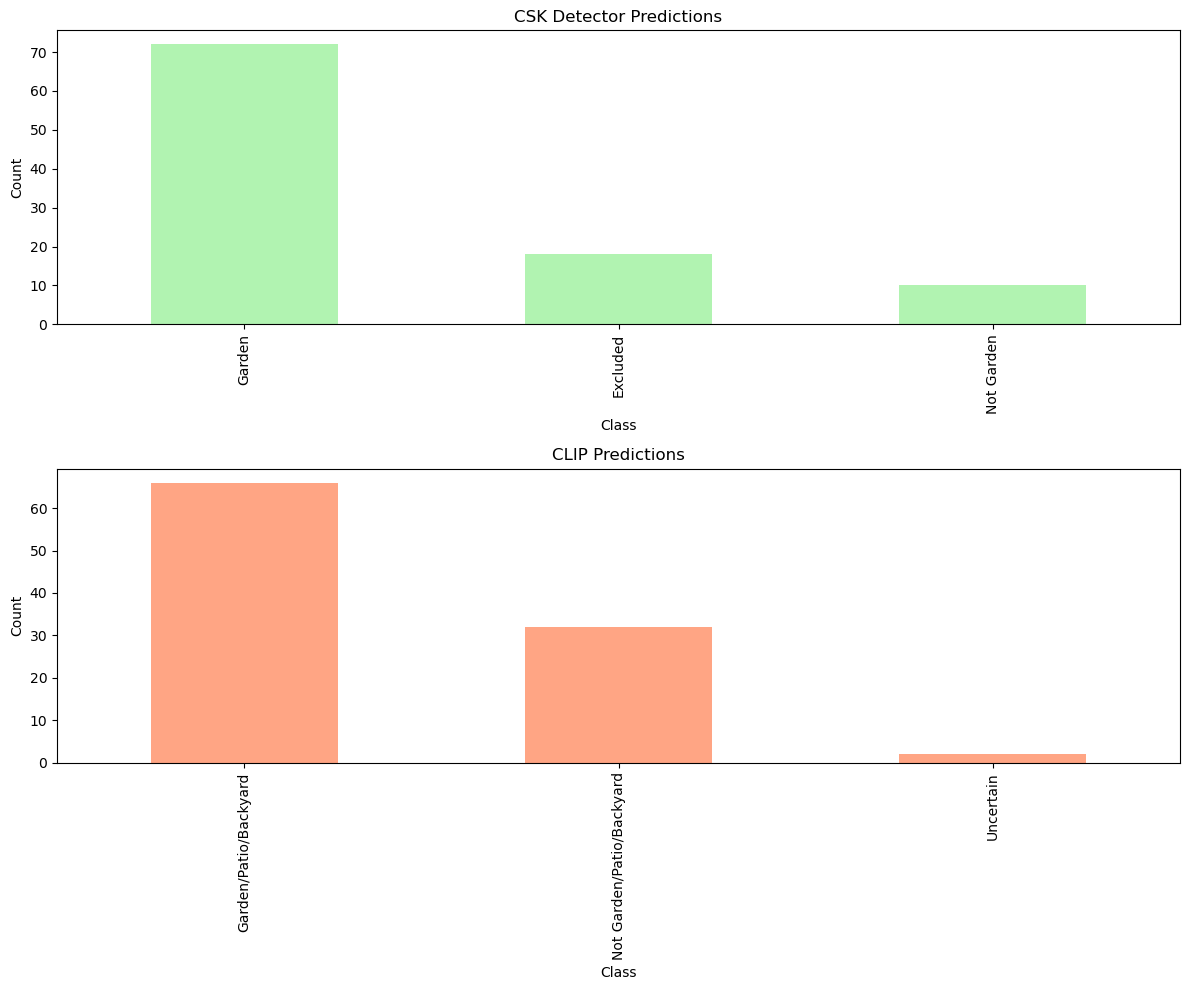

In [119]:
# Display side-by-side bar charts for the two predictions
df_comparison['image_index'] = df_comparison.index

fig, axes = plt.subplots(nrows=2, figsize=(12, 10))

# Plot for Decision Tree predictions
df_comparison['predicted_class'].value_counts().plot(kind='bar', ax=axes[0], color='lightgreen', title="CSK Detector Predictions", alpha=0.7)
axes[0].set_xlabel('Class')
axes[0].set_ylabel('Count')

# Plot for CLIP predictions
df_comparison['clip_predicted_class'].value_counts().plot(kind='bar', ax=axes[1], color='coral', title="CLIP Predictions", alpha=0.7)
axes[1].set_xlabel('Class')
axes[1].set_ylabel('Count')

plt.tight_layout()
plt.show()


**Compare the Accuracy**
Explanation:

    ['Nursery'] * len(df_comparison): This creates a list where each element is "Nursery," matching the number of images in your test set.
    df_comparison['predicted_class']: This contains the predictions from the Decision Tree model.
    df_comparison['clip_predicted_class']: This contains the predictions from the CLIP model.
    We then use accuracy_score to calculate how many of the predicted labels match the true label ("Nursery").

This will give you two accuracy values:

    Decision Tree accuracy: How well the Decision Tree performed.
    CLIP accuracy: How well the CLIP model performed.

In [116]:
pip install seaborn


  Using cached seaborn-0.13.2-py3-none-any.whl.metadata (5.4 kB)
Using cached seaborn-0.13.2-py3-none-any.whl (294 kB)
Note: you may need to restart the kernel to use updated packages.


CSK Detector metrics:
Accuracy: 0.88
Precision: 1.00
Recall: 0.88
F1-score: 0.94

CLIP metrics:
Accuracy: 0.67
Precision: 1.00
Recall: 0.67
F1-score: 0.80


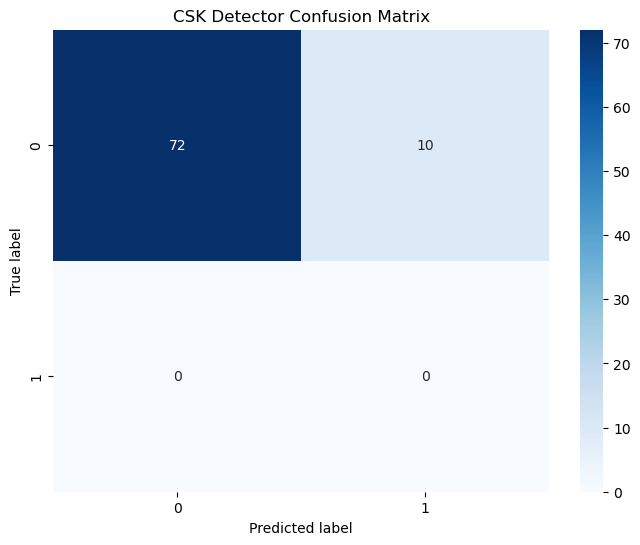

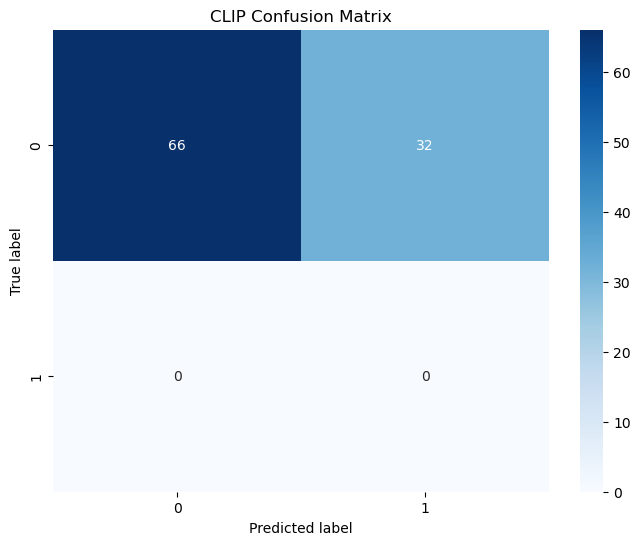

In [121]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt


true_labels = ['Garden'] * len(df_comparison)


def map_to_binary(prediction):
    if prediction in ['Garden', 'Garden/Patio/Backyard']:
        return 'Garden'
    elif prediction in ['Not Garden', 'Not Garden/Patio/Backyard']:
        return 'Not Garden'
    else:
        return None  # This will filter out 'Uncertain' and 'Excluded'


dt_binary_predictions = df_comparison['predicted_class'].apply(map_to_binary)
clip_binary_predictions = df_comparison['clip_predicted_class'].apply(map_to_binary)


dt_mask = dt_binary_predictions.notna()
clip_mask = clip_binary_predictions.notna()


dt_accuracy = accuracy_score(np.array(true_labels)[dt_mask], dt_binary_predictions[dt_mask])
dt_precision = precision_score(np.array(true_labels)[dt_mask], dt_binary_predictions[dt_mask], pos_label='Garden')
dt_recall = recall_score(np.array(true_labels)[dt_mask], dt_binary_predictions[dt_mask], pos_label='Garden')
dt_f1 = f1_score(np.array(true_labels)[dt_mask], dt_binary_predictions[dt_mask], pos_label='Garden')


clip_accuracy = accuracy_score(np.array(true_labels)[clip_mask], clip_binary_predictions[clip_mask])
clip_precision = precision_score(np.array(true_labels)[clip_mask], clip_binary_predictions[clip_mask], pos_label='Garden')
clip_recall = recall_score(np.array(true_labels)[clip_mask], clip_binary_predictions[clip_mask], pos_label='Garden')
clip_f1 = f1_score(np.array(true_labels)[clip_mask], clip_binary_predictions[clip_mask], pos_label='Garden')


print("CSK Detector metrics:")
print(f"Accuracy: {dt_accuracy:.2f}")
print(f"Precision: {dt_precision:.2f}")
print(f"Recall: {dt_recall:.2f}")
print(f"F1-score: {dt_f1:.2f}")

print("\nCLIP metrics:")
print(f"Accuracy: {clip_accuracy:.2f}")
print(f"Precision: {clip_precision:.2f}")
print(f"Recall: {clip_recall:.2f}")
print(f"F1-score: {clip_f1:.2f}")


def plot_confusion_matrix(y_true, y_pred, title):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(8,6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(title)
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()

# Plot confusion matrices
plot_confusion_matrix(np.array(true_labels)[dt_mask], dt_binary_predictions[dt_mask], 'CSK Detector Confusion Matrix')
plot_confusion_matrix(np.array(true_labels)[clip_mask], clip_binary_predictions[clip_mask], 'CLIP Confusion Matrix')
